in this code we first find beads of the particle which have 3  bonds ( bc all the beads have 4 bonds except the last outer layer which have 3 bonds). then find the beads that have bond with that last outer layer so they are beads of the second outer layer. Thank GOD 

In [1]:
import math
import collections
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
lines=[]
 # to read lines if atomlist after "Atoms"
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\np12.dat') as fp:
        for line in fp:
            if 'Atoms' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'Velocities' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    lines.append(line)# add the string in to the list
                    #lines= line.split("space")# for line in a pandas data frame. here it can not read our lines separetely. it reads all lines as a line so does not split it into different indexs

In [3]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [30]:
df=pd.DataFrame(lines, columns=['atomID']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomID','atomType','x','y','z','mx','my','mz']] = df.atomID.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
df

,atomID,atomType,x,y,z,mx,my,mz
0,1,1,0.0000000000000000e+00,0.0000000000000000e+00,5.9833363391766650e+00,0,0,0
1,2,1,2.6177096483897908e+00,6.4771515580875072e-01,5.2354192967795816e+00,0,0,0
2,3,1,2.2437511271912491e+00,1.2954303116175017e+00,5.2354192967795816e+00,0,0,0
3,4,1,1.8697926059927079e+00,1.9431454674262525e+00,5.2354192967795816e+00,0,0,0
4,5,1,2.6177096483897908e+00,-6.4771515580875072e-01,5.2354192967795816e+00,0,0,0
5,6,1,2.2437511271912491e+00,0.0000000000000000e+00,5.2354192967795816e+00,0,0,0
6,7,1,1.8697926059927079e+00,6.4771515580875094e-01,5.2354192967795816e+00,0,0,0
7,8,1,1.4958340847941662e+00,1.2954303116175019e+00,5.2354192967795816e+00,0,0,0
8,9,1,1.1218755635956246e+00,1.9431454674262525e+00,5.2354192967795816e+00,0,0,0
9,10,1,7.4791704239708312e-01,2.5908606232350033e+00,5.2354192967795816e+00,0,0,0


In [5]:
atom_counter=len(df)
atom_counter

2501

In [6]:
#find distance between the beads
Xmsd=np.zeros ((atom_counter,atom_counter))# make 2D arrays
Ymsd=np.zeros ((atom_counter,atom_counter))
Zmsd=np.zeros ((atom_counter,atom_counter))
#Rmsd=np.zeros ((atom_counter,atom_counter))
Rmsd=np.zeros ((atom_counter+1,atom_counter+1)) # bc of last rmsd for second layer of outer layer
# #double array bc we want compare distances for each i and j  with each other
min_Rmsd=np.zeros (atom_counter)
min_all=np.zeros (atom_counter)

df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)

#smallest = float("inf") # infinity


for i in range(0, atom_counter-1):
  smallest = float("inf") # infinity. to renew after each i to just find min of each i not min of the whole.
  for j in range(i+1, atom_counter):
  
    dx=df.loc[j,'x']-df.loc[i,'x']
    dy=df.loc[j,'y']-df.loc[i,'y']
    dz=df.loc[j,'z']-df.loc[i,'z']

    Xmsd[i,j]+=np.power(dx,2)
    Ymsd[i,j]+=np.power(dy,2)
    Zmsd[i,j]+=np.power(dz,2)
        
    #distance of all beads from each other without repeating 2-1 after calc distance of 1-2. it is distance of 3 and 4 and is not distance 3 ordistance of 4. Rmsd[3,4] and not Rmsd[3] or Rmsd[4]
    Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);
    
    #find the min of Rmsd array
    num= float(Rmsd[i,j])    
    smallest = min(smallest,num)
    min_Rmsd[i]=smallest
    #print (j,"  ",i,"  ",Rmsd[i,j],"   ",min_Rmsd[i])
    #print(i,"  ",Rmsd[i,j])

   

In [7]:

#print (Rmsd[0,:])
print(min_Rmsd[:])

[0.74791704 0.74791704 0.74791704 ... 0.74791704 2.79844933 0.        ]


In [8]:
#to find min of all min_Rmsd
smallest = float("inf") # infinity
for i in range(0, atom_counter-1): # we have five bond (distance) between 6 beads
    num= float(min_Rmsd[i])    
    smallest = min(smallest,num)
    min_all[i]=smallest
    smallest_bead_distance= round(min_all[i],4)# round the float to 4 decimal
print (i,"    ",smallest_bead_distance)

2499      0.7479


**find the bond list and print it in a file. Thank GOD!**

combine this code with double for loop above to save time

In [9]:
#here we combine two tasks above to make the code faster and so we do:
#1) find beads that have the min of distances and then count number of bonds with that size( distance) each bead has 
#2)show the beads with the least distance with each bead in front of that bead and print in a file
counter_bond=0 # to count total number of  bonds
#bonded_beads_i=np.zeros((atom_counter,atom_counter))
#bonded_beads_j=np.zeros((atom_counter,atom_counter))


count_bonded=np.zeros(atom_counter)
i=0
j=0



 #for i in range(0, 9):
for i in range(0, atom_counter-1):
   counter=0  
   for j in range(i+1, atom_counter):

    if round(Rmsd[i,j],4) == smallest_bead_distance:
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
       counter_bond+=1

       count_bonded[i]+=1 # count number of bonds
print(counter_bond)

9058


In [11]:
#to find max # of bonds a bead can have
largest = float("-inf") # infinity
max_bond= np.zeros(atom_counter)
i=0


for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded[i])    
    largest = max(largest,num)
    max_bond[i]=largest
    
print (i,"    ",max_bond[i])
maximum_bond=max_bond[i].astype(int)

2500      4.0


here we read the bonds and for bond j which is a 3d array we convert it to 1D all in this code

In [17]:
#here we combine 3 tasks above to make the code faster and so we do:
#1) find beads that have the min of distances and then count number of bonds with that size( distance) each bead has 
#2)show the beads with the least distance with each bead in front of that bead and print in a file
#3)thank GOD thank GOD read array of bounded_beads_j and put in a 1D array

counter_total_bond=0 # to count total number of  bonds
counter_j=0
bonded_beads_arr_j=np.zeros(counter_bond)
bonded_beads_i=np.zeros((atom_counter,maximum_bond+1))
bonded_beads_j=np.zeros((atom_counter,atom_counter,maximum_bond+1)) # 3d array

i=0
j=0

df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int




for i in range(0, atom_counter-1):
   counter=0  
   for j in range(i+1, atom_counter):

    if round(Rmsd[i,j],4) == smallest_bead_distance:
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
       counter_total_bond+=1
       #print(i,'',j,'',Rmsd[i,j])

       bonded_beads_i[i][counter]=df.loc[i,'atomID'] # to save the beads that have least distance with a bead in an array for that bead as i
       bonded_beads_j[i][j][counter]=df.loc[j,'atomID'] # to save the beads that have least distance with a bead in an array for that bead as j
          
       if bonded_beads_j[i][j][counter] != 0: # Thank GOD! for j bond we need to put the 3D array to 1D in here otherwise I have to make a 3 for loop to read this 3D array and then put in a 1D array which is very time consuming
             bonded_beads_arr_j[counter_j] =bonded_beads_j[i][j][counter]  #convert 3D to 1D array Thank GOD!
             print(i,'  ',j,'   ',counter_j,'  ',bonded_beads_arr_j[counter_j])
             counter_j+=1
       
       
       # to print in a file
       #original_stdout = sys.stdout # Save a reference to the original standard output
       #sys.stdout = f # Change the standard output to the file we created.
       #print( i,"   ",counter,"   ",j,"   ",int(bonded_beads_j[i][j][counter]))
       #print( i,"   ",j,"   ", int(bonded_beads_i[i][counter]),"    ",int(bonded_beads_j[j][counter]))
       #sys.stdout = original_stdout # Reset the standard output to its original value

0    28     0    29.0
1    2     1    3.0
1    5     2    6.0
1    6     3    7.0
1    68     4    69.0
2    3     5    4.0
2    6     6    7.0
2    7     7    8.0
2    69     8    70.0
3    7     9    8.0
3    8     10    9.0
3    70     11    71.0
4    5     12    6.0
4    10     13    11.0
4    11     14    12.0
4    76     15    77.0
5    6     16    7.0
5    11     17    12.0
5    12     18    13.0
5    77     19    78.0
6    7     20    8.0
6    12     21    13.0
6    13     22    14.0
6    78     23    79.0
7    8     24    9.0
7    13     25    14.0
7    14     26    15.0
7    79     27    80.0
8    9     28    10.0
8    14     29    15.0
8    15     30    16.0
8    80     31    81.0
9    15     32    16.0
9    16     33    17.0
9    81     34    82.0
10    11     35    12.0
10    17     36    18.0
10    18     37    19.0
10    86     38    87.0
11    12     39    13.0
11    18     40    19.0
11    19     41    20.0
11    87     42    88.0
12    13     43    14.0
12    19     4

108    109     393    110.0
108    118     394    119.0
108    119     395    120.0
108    238     396    239.0
109    110     397    111.0
109    119     398    120.0
109    120     399    121.0
109    239     400    240.0
110    111     401    112.0
110    120     402    121.0
110    121     403    122.0
110    240     404    241.0
111    112     405    113.0
111    121     406    122.0
111    122     407    123.0
111    241     408    242.0
112    113     409    114.0
112    122     410    123.0
112    123     411    124.0
112    242     412    243.0
113    114     413    115.0
113    123     414    124.0
113    124     415    125.0
113    243     416    244.0
114    115     417    116.0
114    124     418    125.0
114    125     419    126.0
114    244     420    245.0
115    125     421    126.0
115    245     422    246.0
116    117     423    118.0
116    126     424    127.0
116    127     425    128.0
116    248     426    249.0
117    118     427    119.0
117    127     428  

209    222     763    223.0
209    367     764    368.0
210    211     765    212.0
210    222     766    223.0
210    223     767    224.0
210    368     768    369.0
211    212     769    213.0
211    223     770    224.0
211    224     771    225.0
211    369     772    370.0
212    213     773    214.0
212    224     774    225.0
212    225     775    226.0
212    370     776    371.0
213    214     777    215.0
213    225     778    226.0
213    226     779    227.0
213    371     780    372.0
214    215     781    216.0
214    226     782    227.0
214    227     783    228.0
214    372     784    373.0
215    216     785    217.0
215    227     786    228.0
215    228     787    229.0
215    373     788    374.0
216    217     789    218.0
216    228     790    229.0
216    229     791    230.0
216    374     792    375.0
217    218     793    219.0
217    229     794    230.0
217    230     795    231.0
217    375     796    376.0
218    219     797    220.0
218    230     798  

303    304     1118    305.0
303    311     1119    312.0
303    467     1120    468.0
304    468     1121    469.0
305    306     1122    307.0
305    470     1123    471.0
306    307     1124    308.0
306    312     1125    313.0
306    471     1126    472.0
307    308     1127    309.0
307    312     1128    313.0
307    313     1129    314.0
307    472     1130    473.0
308    309     1131    310.0
308    313     1132    314.0
308    314     1133    315.0
308    473     1134    474.0
309    310     1135    311.0
309    314     1136    315.0
309    315     1137    316.0
309    474     1138    475.0
310    311     1139    312.0
310    315     1140    316.0
310    475     1141    476.0
311    476     1142    477.0
312    313     1143    314.0
312    479     1144    480.0
313    314     1145    315.0
313    480     1146    481.0
314    315     1147    316.0
314    481     1148    482.0
315    482     1149    483.0
316    319     1150    320.0
316    320     1151    321.0
316    487    

395    396     1454    397.0
395    408     1455    409.0
395    409     1456    410.0
395    579     1457    580.0
396    397     1458    398.0
396    409     1459    410.0
396    410     1460    411.0
396    580     1461    581.0
397    398     1462    399.0
397    410     1463    411.0
397    411     1464    412.0
397    581     1465    582.0
398    399     1466    400.0
398    411     1467    412.0
398    412     1468    413.0
398    582     1469    583.0
399    400     1470    401.0
399    412     1471    413.0
399    413     1472    414.0
399    583     1473    584.0
400    401     1474    402.0
400    413     1475    414.0
400    414     1476    415.0
400    584     1477    585.0
401    402     1478    403.0
401    414     1479    415.0
401    415     1480    416.0
401    585     1481    586.0
402    403     1482    404.0
402    415     1483    416.0
402    416     1484    417.0
402    586     1485    587.0
403    404     1486    405.0
403    416     1487    417.0
403    417    

489    495     1791    496.0
489    496     1792    497.0
489    689     1793    690.0
490    491     1794    492.0
490    499     1795    500.0
490    500     1796    501.0
490    692     1797    693.0
491    492     1798    493.0
491    500     1799    501.0
491    501     1800    502.0
491    693     1801    694.0
492    493     1802    494.0
492    501     1803    502.0
492    502     1804    503.0
492    694     1805    695.0
493    494     1806    495.0
493    502     1807    503.0
493    503     1808    504.0
493    695     1809    696.0
494    495     1810    496.0
494    503     1811    504.0
494    504     1812    505.0
494    696     1813    697.0
495    496     1814    497.0
495    504     1815    505.0
495    505     1816    506.0
495    697     1817    698.0
496    497     1818    498.0
496    505     1819    506.0
496    506     1820    507.0
496    698     1821    699.0
497    506     1822    507.0
497    507     1823    508.0
497    699     1824    700.0
498    499    

574    575     2122    576.0
574    588     2123    589.0
574    589     2124    590.0
574    778     2125    779.0
575    576     2126    577.0
575    589     2127    590.0
575    590     2128    591.0
575    779     2129    780.0
576    590     2130    591.0
576    591     2131    592.0
576    780     2132    781.0
577    578     2133    579.0
577    592     2134    593.0
577    782     2135    783.0
578    579     2136    580.0
578    592     2137    593.0
578    593     2138    594.0
578    783     2139    784.0
579    580     2140    581.0
579    593     2141    594.0
579    594     2142    595.0
579    784     2143    785.0
580    581     2144    582.0
580    594     2145    595.0
580    595     2146    596.0
580    785     2147    786.0
581    582     2148    583.0
581    595     2149    596.0
581    596     2150    597.0
581    786     2151    787.0
582    583     2152    584.0
582    596     2153    597.0
582    597     2154    598.0
582    787     2155    788.0
583    584    

657    668     2440    669.0
657    669     2441    670.0
657    864     2442    865.0
658    659     2443    660.0
658    669     2444    670.0
658    670     2445    671.0
658    865     2446    866.0
659    670     2447    671.0
659    866     2448    867.0
660    661     2449    662.0
660    867     2450    868.0
661    662     2451    663.0
661    671     2452    672.0
661    868     2453    869.0
662    663     2454    664.0
662    671     2455    672.0
662    672     2456    673.0
662    869     2457    870.0
663    664     2458    665.0
663    672     2459    673.0
663    673     2460    674.0
663    870     2461    871.0
664    665     2462    666.0
664    673     2463    674.0
664    674     2464    675.0
664    871     2465    872.0
665    666     2466    667.0
665    674     2467    675.0
665    675     2468    676.0
665    872     2469    873.0
666    667     2470    668.0
666    675     2471    676.0
666    676     2472    677.0
666    873     2473    874.0
667    668    

748    762     2772    763.0
748    763     2773    764.0
748    970     2774    971.0
749    750     2775    751.0
749    763     2776    764.0
749    764     2777    765.0
749    971     2778    972.0
750    764     2779    765.0
750    765     2780    766.0
750    972     2781    973.0
751    752     2782    753.0
751    766     2783    767.0
751    767     2784    768.0
751    974     2785    975.0
752    753     2786    754.0
752    767     2787    768.0
752    768     2788    769.0
752    975     2789    976.0
753    754     2790    755.0
753    768     2791    769.0
753    769     2792    770.0
753    976     2793    977.0
754    755     2794    756.0
754    769     2795    770.0
754    770     2796    771.0
754    977     2797    978.0
755    756     2798    757.0
755    770     2799    771.0
755    771     2800    772.0
755    978     2801    979.0
756    757     2802    758.0
756    771     2803    772.0
756    772     2804    773.0
756    979     2805    980.0
757    758    

835    849     3108    850.0
835    1059     3109    1060.0
836    837     3110    838.0
836    849     3111    850.0
836    850     3112    851.0
836    1060     3113    1061.0
837    838     3114    839.0
837    850     3115    851.0
837    851     3116    852.0
837    1061     3117    1062.0
838    839     3118    840.0
838    851     3119    852.0
838    852     3120    853.0
838    1062     3121    1063.0
839    840     3122    841.0
839    852     3123    853.0
839    853     3124    854.0
839    1063     3125    1064.0
840    841     3126    842.0
840    853     3127    854.0
840    854     3128    855.0
840    1064     3129    1065.0
841    854     3130    855.0
841    1065     3131    1066.0
842    843     3132    844.0
842    855     3133    856.0
842    1068     3134    1069.0
843    844     3135    845.0
843    855     3136    856.0
843    856     3137    857.0
843    1069     3138    1070.0
844    845     3139    846.0
844    856     3140    857.0
844    857     3141    85

936    950     3474    951.0
936    951     3475    952.0
936    1173     3476    1174.0
937    938     3477    939.0
937    951     3478    952.0
937    952     3479    953.0
937    1174     3480    1175.0
938    939     3481    940.0
938    952     3482    953.0
938    953     3483    954.0
938    1175     3484    1176.0
939    940     3485    941.0
939    953     3486    954.0
939    954     3487    955.0
939    1176     3488    1177.0
940    941     3489    942.0
940    954     3490    955.0
940    955     3491    956.0
940    1177     3492    1178.0
941    942     3493    943.0
941    955     3494    956.0
941    956     3495    957.0
941    1178     3496    1179.0
942    956     3497    957.0
942    957     3498    958.0
942    1179     3499    1180.0
943    944     3500    945.0
943    958     3501    959.0
943    959     3502    960.0
943    1180     3503    1181.0
944    945     3504    946.0
944    959     3505    960.0
944    960     3506    961.0
944    1181     3507    118

1022    1023     3806    1024.0
1022    1037     3807    1038.0
1022    1038     3808    1039.0
1022    1261     3809    1262.0
1023    1024     3810    1025.0
1023    1038     3811    1039.0
1023    1039     3812    1040.0
1023    1262     3813    1263.0
1024    1025     3814    1026.0
1024    1039     3815    1040.0
1024    1040     3816    1041.0
1024    1263     3817    1264.0
1025    1026     3818    1027.0
1025    1040     3819    1041.0
1025    1041     3820    1042.0
1025    1264     3821    1265.0
1026    1027     3822    1028.0
1026    1041     3823    1042.0
1026    1042     3824    1043.0
1026    1265     3825    1266.0
1027    1028     3826    1029.0
1027    1042     3827    1043.0
1027    1043     3828    1044.0
1027    1266     3829    1267.0
1028    1029     3830    1030.0
1028    1043     3831    1044.0
1028    1044     3832    1045.0
1028    1267     3833    1268.0
1029    1030     3834    1031.0
1029    1044     3835    1045.0
1029    1045     3836    1046.0
1029    

1144    1156     4250    1157.0
1144    1383     4251    1384.0
1145    1146     4252    1147.0
1145    1156     4253    1157.0
1145    1157     4254    1158.0
1145    1384     4255    1385.0
1146    1147     4256    1148.0
1146    1157     4257    1158.0
1146    1158     4258    1159.0
1146    1385     4259    1386.0
1147    1148     4260    1149.0
1147    1158     4261    1159.0
1147    1159     4262    1160.0
1147    1386     4263    1387.0
1148    1149     4264    1150.0
1148    1159     4265    1160.0
1148    1160     4266    1161.0
1148    1387     4267    1388.0
1149    1150     4268    1151.0
1149    1160     4269    1161.0
1149    1161     4270    1162.0
1149    1388     4271    1389.0
1150    1151     4272    1152.0
1150    1161     4273    1162.0
1150    1162     4274    1163.0
1150    1389     4275    1390.0
1151    1152     4276    1153.0
1151    1162     4277    1163.0
1151    1163     4278    1164.0
1151    1390     4279    1391.0
1152    1163     4280    1164.0
1152    

1246    1263     4647    1264.0
1246    1484     4648    1485.0
1247    1248     4649    1249.0
1247    1263     4650    1264.0
1247    1264     4651    1265.0
1247    1485     4652    1486.0
1248    1249     4653    1250.0
1248    1264     4654    1265.0
1248    1265     4655    1266.0
1248    1486     4656    1487.0
1249    1250     4657    1251.0
1249    1265     4658    1266.0
1249    1266     4659    1267.0
1249    1487     4660    1488.0
1250    1251     4661    1252.0
1250    1266     4662    1267.0
1250    1267     4663    1268.0
1250    1488     4664    1489.0
1251    1252     4665    1253.0
1251    1267     4666    1268.0
1251    1268     4667    1269.0
1251    1489     4668    1490.0
1252    1253     4669    1254.0
1252    1268     4670    1269.0
1252    1269     4671    1270.0
1252    1490     4672    1491.0
1253    1254     4673    1255.0
1253    1269     4674    1270.0
1253    1270     4675    1271.0
1253    1491     4676    1492.0
1254    1255     4677    1256.0
1254    

1322    1335     4936    1336.0
1322    1336     4937    1337.0
1322    1559     4938    1560.0
1323    1324     4939    1325.0
1323    1336     4940    1337.0
1323    1337     4941    1338.0
1323    1560     4942    1561.0
1324    1325     4943    1326.0
1324    1337     4944    1338.0
1324    1338     4945    1339.0
1324    1561     4946    1562.0
1325    1326     4947    1327.0
1325    1338     4948    1339.0
1325    1339     4949    1340.0
1325    1562     4950    1563.0
1326    1327     4951    1328.0
1326    1339     4952    1340.0
1326    1340     4953    1341.0
1326    1563     4954    1564.0
1327    1328     4955    1329.0
1327    1340     4956    1341.0
1327    1341     4957    1342.0
1327    1564     4958    1565.0
1328    1329     4959    1330.0
1328    1341     4960    1342.0
1328    1342     4961    1343.0
1328    1565     4962    1566.0
1329    1330     4963    1331.0
1329    1342     4964    1343.0
1329    1343     4965    1344.0
1329    1566     4966    1567.0
1330    

1405    1420     5225    1421.0
1406    1407     5226    1408.0
1406    1420     5227    1421.0
1406    1421     5228    1422.0
1406    1634     5229    1635.0
1407    1408     5230    1409.0
1407    1421     5231    1422.0
1407    1422     5232    1423.0
1407    1635     5233    1636.0
1408    1409     5234    1410.0
1408    1422     5235    1423.0
1408    1423     5236    1424.0
1408    1636     5237    1637.0
1409    1410     5238    1411.0
1409    1423     5239    1424.0
1409    1424     5240    1425.0
1409    1637     5241    1638.0
1410    1411     5242    1412.0
1410    1424     5243    1425.0
1410    1425     5244    1426.0
1410    1638     5245    1639.0
1411    1412     5246    1413.0
1411    1425     5247    1426.0
1411    1426     5248    1427.0
1411    1639     5249    1640.0
1412    1413     5250    1414.0
1412    1426     5251    1427.0
1412    1427     5252    1428.0
1412    1640     5253    1641.0
1413    1414     5254    1415.0
1413    1427     5255    1428.0
1413    

1514    1515     5640    1516.0
1514    1529     5641    1530.0
1514    1530     5642    1531.0
1514    1737     5643    1738.0
1515    1516     5644    1517.0
1515    1530     5645    1531.0
1515    1531     5646    1532.0
1515    1738     5647    1739.0
1516    1517     5648    1518.0
1516    1531     5649    1532.0
1516    1532     5650    1533.0
1516    1739     5651    1740.0
1517    1518     5652    1519.0
1517    1532     5653    1533.0
1517    1533     5654    1534.0
1517    1740     5655    1741.0
1518    1519     5656    1520.0
1518    1533     5657    1534.0
1518    1534     5658    1535.0
1518    1741     5659    1742.0
1519    1520     5660    1521.0
1519    1534     5661    1535.0
1519    1535     5662    1536.0
1519    1742     5663    1743.0
1520    1521     5664    1522.0
1520    1535     5665    1536.0
1520    1536     5666    1537.0
1520    1743     5667    1744.0
1521    1522     5668    1523.0
1521    1536     5669    1537.0
1521    1537     5670    1538.0
1521    

1598    1603     5942    1604.0
1598    1604     5943    1605.0
1598    1813     5944    1814.0
1599    1600     5945    1601.0
1599    1604     5946    1605.0
1599    1605     5947    1606.0
1599    1814     5948    1815.0
1600    1601     5949    1602.0
1600    1605     5950    1606.0
1600    1815     5951    1816.0
1601    1816     5952    1817.0
1602    1603     5953    1604.0
1603    1604     5954    1605.0
1604    1605     5955    1606.0
1606    1607     5956    1608.0
1606    1614     5957    1615.0
1606    1615     5958    1616.0
1607    1608     5959    1609.0
1607    1615     5960    1616.0
1607    1616     5961    1617.0
1607    1817     5962    1818.0
1608    1609     5963    1610.0
1608    1616     5964    1617.0
1608    1617     5965    1618.0
1608    1818     5966    1819.0
1609    1610     5967    1611.0
1609    1617     5968    1618.0
1609    1618     5969    1619.0
1609    1819     5970    1820.0
1610    1611     5971    1612.0
1610    1618     5972    1619.0
1610    

1700    1716     6321    1717.0
1700    1906     6322    1907.0
1701    1702     6323    1703.0
1701    1716     6324    1717.0
1701    1717     6325    1718.0
1701    1907     6326    1908.0
1702    1703     6327    1704.0
1702    1717     6328    1718.0
1702    1718     6329    1719.0
1702    1908     6330    1909.0
1703    1718     6331    1719.0
1704    1705     6332    1706.0
1704    1719     6333    1720.0
1704    1720     6334    1721.0
1704    1909     6335    1910.0
1705    1706     6336    1707.0
1705    1720     6337    1721.0
1705    1721     6338    1722.0
1705    1910     6339    1911.0
1706    1707     6340    1708.0
1706    1721     6341    1722.0
1706    1722     6342    1723.0
1706    1911     6343    1912.0
1707    1708     6344    1709.0
1707    1722     6345    1723.0
1707    1723     6346    1724.0
1707    1912     6347    1913.0
1708    1709     6348    1710.0
1708    1723     6349    1724.0
1708    1724     6350    1725.0
1708    1913     6351    1914.0
1709    

1805    1813     6712    1814.0
1805    1814     6713    1815.0
1805    2007     6714    2008.0
1806    1807     6715    1808.0
1806    1814     6716    1815.0
1806    1815     6717    1816.0
1806    2008     6718    2009.0
1807    1808     6719    1809.0
1807    1815     6720    1816.0
1807    1816     6721    1817.0
1807    2009     6722    2010.0
1808    1809     6723    1810.0
1808    1816     6724    1817.0
1808    2010     6725    2011.0
1810    1811     6726    1812.0
1811    1812     6727    1813.0
1811    2011     6728    2012.0
1812    1813     6729    1814.0
1812    2012     6730    2013.0
1813    1814     6731    1815.0
1813    2013     6732    2014.0
1814    1815     6733    1816.0
1814    2014     6734    2015.0
1815    1816     6735    1817.0
1815    2015     6736    2016.0
1817    1818     6737    1819.0
1817    1823     6738    1824.0
1817    1824     6739    1825.0
1818    1819     6740    1820.0
1818    1824     6741    1825.0
1818    1825     6742    1826.0
1819    

1920    1935     7125    1936.0
1920    2104     7126    2105.0
1921    1922     7127    1923.0
1921    1935     7128    1936.0
1921    1936     7129    1937.0
1921    2105     7130    2106.0
1922    1923     7131    1924.0
1922    1936     7132    1937.0
1922    1937     7133    1938.0
1922    2106     7134    2107.0
1923    1937     7135    1938.0
1924    1925     7136    1926.0
1924    1938     7137    1939.0
1924    1939     7138    1940.0
1924    2107     7139    2108.0
1925    1926     7140    1927.0
1925    1939     7141    1940.0
1925    1940     7142    1941.0
1925    2108     7143    2109.0
1926    1927     7144    1928.0
1926    1940     7145    1941.0
1926    1941     7146    1942.0
1926    2109     7147    2110.0
1927    1928     7148    1929.0
1927    1941     7149    1942.0
1927    1942     7150    1943.0
1927    2110     7151    2111.0
1928    1929     7152    1930.0
1928    1942     7153    1943.0
1928    1943     7154    1944.0
1928    2111     7155    2112.0
1929    

2052    2065     7587    2066.0
2052    2215     7588    2216.0
2053    2054     7589    2055.0
2053    2065     7590    2066.0
2053    2066     7591    2067.0
2053    2216     7592    2217.0
2054    2066     7593    2067.0
2055    2056     7594    2057.0
2055    2067     7595    2068.0
2055    2068     7596    2069.0
2055    2217     7597    2218.0
2056    2057     7598    2058.0
2056    2068     7599    2069.0
2056    2069     7600    2070.0
2056    2218     7601    2219.0
2057    2058     7602    2059.0
2057    2069     7603    2070.0
2057    2070     7604    2071.0
2057    2219     7605    2220.0
2058    2059     7606    2060.0
2058    2070     7607    2071.0
2058    2071     7608    2072.0
2058    2220     7609    2221.0
2059    2060     7610    2061.0
2059    2071     7611    2072.0
2059    2072     7612    2073.0
2059    2221     7613    2222.0
2060    2061     7614    2062.0
2060    2072     7615    2073.0
2060    2073     7616    2074.0
2060    2222     7617    2223.0
2061    

2126    2138     7865    2139.0
2126    2139     7866    2140.0
2126    2284     7867    2285.0
2127    2128     7868    2129.0
2127    2139     7869    2140.0
2127    2140     7870    2141.0
2127    2285     7871    2286.0
2128    2129     7872    2130.0
2128    2140     7873    2141.0
2128    2141     7874    2142.0
2128    2286     7875    2287.0
2129    2130     7876    2131.0
2129    2141     7877    2142.0
2129    2142     7878    2143.0
2129    2287     7879    2288.0
2130    2131     7880    2132.0
2130    2142     7881    2143.0
2130    2143     7882    2144.0
2130    2288     7883    2289.0
2131    2132     7884    2133.0
2131    2143     7885    2144.0
2131    2144     7886    2145.0
2131    2289     7887    2290.0
2132    2133     7888    2134.0
2132    2144     7889    2145.0
2132    2145     7890    2146.0
2132    2290     7891    2291.0
2133    2145     7892    2146.0
2133    2291     7893    2292.0
2134    2135     7894    2136.0
2134    2146     7895    2147.0
2134    

2215    2216     8163    2217.0
2215    2226     8164    2227.0
2215    2227     8165    2228.0
2215    2353     8166    2354.0
2216    2227     8167    2228.0
2216    2228     8168    2229.0
2217    2218     8169    2219.0
2217    2229     8170    2230.0
2217    2230     8171    2231.0
2218    2219     8172    2220.0
2218    2230     8173    2231.0
2218    2231     8174    2232.0
2218    2354     8175    2355.0
2219    2220     8176    2221.0
2219    2231     8177    2232.0
2219    2232     8178    2233.0
2219    2355     8179    2356.0
2220    2221     8180    2222.0
2220    2232     8181    2233.0
2220    2233     8182    2234.0
2220    2356     8183    2357.0
2221    2222     8184    2223.0
2221    2233     8185    2234.0
2221    2234     8186    2235.0
2221    2357     8187    2358.0
2222    2223     8188    2224.0
2222    2234     8189    2235.0
2222    2235     8190    2236.0
2222    2358     8191    2359.0
2223    2224     8192    2225.0
2223    2235     8193    2236.0
2223    

2297    2298     8463    2299.0
2297    2308     8464    2309.0
2297    2309     8465    2310.0
2297    2421     8466    2422.0
2298    2299     8467    2300.0
2298    2309     8468    2310.0
2298    2310     8469    2311.0
2298    2422     8470    2423.0
2299    2300     8471    2301.0
2299    2310     8472    2311.0
2299    2311     8473    2312.0
2299    2423     8474    2424.0
2300    2301     8475    2302.0
2300    2311     8476    2312.0
2300    2312     8477    2313.0
2300    2424     8478    2425.0
2301    2302     8479    2303.0
2301    2312     8480    2313.0
2301    2313     8481    2314.0
2301    2425     8482    2426.0
2302    2303     8483    2304.0
2302    2313     8484    2314.0
2302    2314     8485    2315.0
2302    2426     8486    2427.0
2303    2314     8487    2315.0
2304    2305     8488    2306.0
2304    2315     8489    2316.0
2305    2306     8490    2307.0
2305    2315     8491    2316.0
2305    2316     8492    2317.0
2305    2427     8493    2428.0
2306    

2401    2411     8796    2412.0
2401    2412     8797    2413.0
2401    2480     8798    2481.0
2402    2403     8799    2404.0
2402    2412     8800    2413.0
2402    2413     8801    2414.0
2402    2481     8802    2482.0
2403    2404     8803    2405.0
2403    2413     8804    2414.0
2403    2414     8805    2415.0
2403    2482     8806    2483.0
2404    2405     8807    2406.0
2404    2414     8808    2415.0
2404    2415     8809    2416.0
2404    2483     8810    2484.0
2405    2415     8811    2416.0
2405    2416     8812    2417.0
2406    2407     8813    2408.0
2406    2417     8814    2418.0
2407    2408     8815    2409.0
2407    2417     8816    2418.0
2407    2418     8817    2419.0
2408    2409     8818    2410.0
2408    2418     8819    2419.0
2408    2419     8820    2420.0
2408    2484     8821    2485.0
2409    2410     8822    2411.0
2409    2419     8823    2420.0
2409    2420     8824    2421.0
2409    2485     8825    2486.0
2410    2411     8826    2412.0
2410    

In [18]:
int(bonded_beads_j[1][2][1])

3

In [ ]:
#thank GOD thank GOD read array of bounded_beads_j and put in a 1D array

#bonded_beads_arr_j=np.zeros(counter_bond)

#counter_j=0


#for i in range(0, atom_counter-1):
  # for j in range(i+1, atom_counter):
     # for counter in range (1, maximum_bond+1):


        #if bonded_beads_j[i][j][counter] != 0: 
          #bonded_beads_arr_j[counter_j] =bonded_beads_j[i][j][counter]  #convert 2D to 1D array Thank GOD!
          #print(i,'  ',j,'   ',counter_j,'  ',bonded_beads_arr_j[counter_j])
          #counter_j+=1
   
          #print( i,'  ',j,"   ",counter,"   ",int(bonded_beads_j[i][j][counter]))

here for i bonds we read the array and in next code we convert the 2D array of bonds i to a 1D array

combine this code with the code below it to save time

In [19]:
#thank GOD read the array bonded_beads_i
i=0
counter=0


#for i in range(1, counter_bond):# use counter bond because we want go through all the bonds which is equal to (num_atoms * maximum bond an atom can have)
for i in range(0, atom_counter):
   for counter in range(1, maximum_bond+1): #since max # of bonds is 4 so our matrix has dimension of 4 in this direction
     if bonded_beads_i[i][counter] != 0: 
       print( i,"   ",int(bonded_beads_i[i][counter]))

0     1
1     2
1     2
1     2
1     2
2     3
2     3
2     3
2     3
3     4
3     4
3     4
4     5
4     5
4     5
4     5
5     6
5     6
5     6
5     6
6     7
6     7
6     7
6     7
7     8
7     8
7     8
7     8
8     9
8     9
8     9
8     9
9     10
9     10
9     10
10     11
10     11
10     11
10     11
11     12
11     12
11     12
11     12
12     13
12     13
12     13
12     13
13     14
13     14
13     14
13     14
14     15
14     15
14     15
14     15
15     16
15     16
15     16
15     16
16     17
16     17
16     17
17     18
17     18
17     18
18     19
18     19
18     19
18     19
19     20
19     20
19     20
19     20
20     21
20     21
20     21
20     21
21     22
21     22
21     22
21     22
22     23
22     23
22     23
22     23
23     24
23     24
23     24
23     24
24     25
24     25
25     26
25     26
25     26
25     26
26     27
26     27
26     27
26     27
27     28
27     28
27     28
27     28
28     29
28     29
28     29
28     

235     236
236     237
236     237
236     237
236     237
237     238
237     238
237     238
237     238
238     239
238     239
238     239
238     239
239     240
239     240
239     240
239     240
240     241
240     241
240     241
240     241
241     242
241     242
241     242
241     242
242     243
242     243
242     243
242     243
243     244
243     244
243     244
243     244
244     245
244     245
244     245
244     245
245     246
245     246
245     246
245     246
246     247
246     247
247     248
247     248
247     248
247     248
248     249
248     249
248     249
248     249
249     250
249     250
249     250
249     250
250     251
250     251
250     251
250     251
251     252
251     252
251     252
251     252
252     253
252     253
252     253
252     253
253     254
253     254
253     254
253     254
254     255
254     255
254     255
254     255
255     256
255     256
255     256
255     256
256     257
256     257
256     257
256     257
257 

425     426
425     426
425     426
426     427
426     427
426     427
426     427
427     428
427     428
427     428
427     428
428     429
428     429
428     429
428     429
429     430
429     430
429     430
429     430
430     431
430     431
430     431
430     431
431     432
431     432
431     432
431     432
432     433
432     433
432     433
432     433
433     434
433     434
434     435
434     435
434     435
434     435
435     436
435     436
435     436
435     436
436     437
436     437
436     437
436     437
437     438
437     438
437     438
437     438
438     439
438     439
438     439
438     439
439     440
439     440
439     440
439     440
440     441
440     441
440     441
440     441
441     442
441     442
441     442
441     442
442     443
442     443
442     443
442     443
443     444
443     444
443     444
443     444
444     445
444     445
444     445
444     445
445     446
445     446
445     446
446     447
446     447
447     448
447 

608     609
608     609
608     609
609     610
609     610
609     610
609     610
610     611
610     611
610     611
610     611
611     612
611     612
611     612
611     612
612     613
612     613
612     613
612     613
613     614
613     614
613     614
613     614
614     615
614     615
614     615
614     615
615     616
615     616
615     616
615     616
616     617
616     617
616     617
616     617
617     618
617     618
617     618
617     618
618     619
618     619
618     619
618     619
619     620
619     620
619     620
619     620
620     621
620     621
621     622
621     622
621     622
622     623
622     623
622     623
622     623
623     624
623     624
623     624
623     624
624     625
624     625
624     625
624     625
625     626
625     626
625     626
625     626
626     627
626     627
626     627
626     627
627     628
627     628
627     628
627     628
628     629
628     629
628     629
628     629
629     630
629     630
629     630
629 

791     792
791     792
791     792
791     792
792     793
792     793
792     793
792     793
793     794
793     794
793     794
793     794
794     795
794     795
794     795
794     795
795     796
795     796
795     796
795     796
796     797
796     797
796     797
797     798
797     798
797     798
798     799
798     799
798     799
798     799
799     800
799     800
799     800
799     800
800     801
800     801
800     801
800     801
801     802
801     802
801     802
801     802
802     803
802     803
802     803
802     803
803     804
803     804
803     804
803     804
804     805
804     805
804     805
804     805
805     806
805     806
805     806
805     806
806     807
806     807
806     807
806     807
807     808
807     808
807     808
807     808
808     809
808     809
808     809
808     809
809     810
809     810
809     810
809     810
810     811
810     811
810     811
810     811
811     812
811     812
811     812
811     812
812     813
812 

1174     1175
1174     1175
1174     1175
1175     1176
1175     1176
1175     1176
1175     1176
1176     1177
1176     1177
1176     1177
1176     1177
1177     1178
1177     1178
1177     1178
1177     1178
1178     1179
1178     1179
1178     1179
1178     1179
1179     1180
1179     1180
1179     1180
1180     1181
1180     1181
1180     1181
1180     1181
1181     1182
1181     1182
1181     1182
1181     1182
1182     1183
1182     1183
1182     1183
1182     1183
1183     1184
1183     1184
1183     1184
1183     1184
1184     1185
1184     1185
1184     1185
1184     1185
1185     1186
1185     1186
1185     1186
1185     1186
1186     1187
1186     1187
1186     1187
1186     1187
1187     1188
1187     1188
1187     1188
1187     1188
1188     1189
1188     1189
1188     1189
1188     1189
1189     1190
1189     1190
1189     1190
1189     1190
1190     1191
1190     1191
1190     1191
1190     1191
1191     1192
1191     1192
1191     1192
1191     1192
1192     1193
1192  

1380     1381
1380     1381
1380     1381
1381     1382
1381     1382
1381     1382
1382     1383
1382     1383
1382     1383
1382     1383
1383     1384
1383     1384
1383     1384
1383     1384
1384     1385
1384     1385
1384     1385
1384     1385
1385     1386
1385     1386
1385     1386
1385     1386
1386     1387
1386     1387
1386     1387
1386     1387
1387     1388
1387     1388
1387     1388
1387     1388
1388     1389
1388     1389
1388     1389
1388     1389
1389     1390
1389     1390
1389     1390
1389     1390
1390     1391
1390     1391
1390     1391
1390     1391
1391     1392
1391     1392
1391     1392
1392     1393
1392     1393
1392     1393
1393     1394
1393     1394
1393     1394
1393     1394
1394     1395
1394     1395
1394     1395
1394     1395
1395     1396
1395     1396
1395     1396
1395     1396
1396     1397
1396     1397
1396     1397
1396     1397
1397     1398
1397     1398
1397     1398
1397     1398
1398     1399
1398     1399
1398     1399
1398  

1599     1600
1600     1601
1600     1601
1600     1601
1601     1602
1602     1603
1603     1604
1604     1605
1606     1607
1606     1607
1606     1607
1607     1608
1607     1608
1607     1608
1607     1608
1608     1609
1608     1609
1608     1609
1608     1609
1609     1610
1609     1610
1609     1610
1609     1610
1610     1611
1610     1611
1610     1611
1610     1611
1611     1612
1611     1612
1611     1612
1611     1612
1612     1613
1612     1613
1613     1614
1613     1614
1613     1614
1614     1615
1614     1615
1614     1615
1614     1615
1615     1616
1615     1616
1615     1616
1615     1616
1616     1617
1616     1617
1616     1617
1616     1617
1617     1618
1617     1618
1617     1618
1617     1618
1618     1619
1618     1619
1618     1619
1618     1619
1619     1620
1619     1620
1619     1620
1619     1620
1620     1621
1620     1621
1620     1621
1620     1621
1621     1622
1621     1622
1621     1622
1621     1622
1622     1623
1622     1623
1623     1624
1623  

1783     1784
1783     1784
1784     1785
1784     1785
1784     1785
1784     1785
1785     1786
1785     1786
1785     1786
1785     1786
1786     1787
1786     1787
1786     1787
1786     1787
1787     1788
1787     1788
1787     1788
1787     1788
1788     1789
1788     1789
1789     1790
1789     1790
1789     1790
1790     1791
1790     1791
1790     1791
1790     1791
1791     1792
1791     1792
1791     1792
1791     1792
1792     1793
1792     1793
1792     1793
1792     1793
1793     1794
1793     1794
1793     1794
1793     1794
1794     1795
1794     1795
1794     1795
1794     1795
1795     1796
1795     1796
1795     1796
1795     1796
1796     1797
1796     1797
1796     1797
1796     1797
1797     1798
1797     1798
1797     1798
1797     1798
1798     1799
1798     1799
1798     1799
1798     1799
1799     1800
1799     1800
1800     1801
1801     1802
1801     1802
1801     1802
1802     1803
1802     1803
1802     1803
1802     1803
1803     1804
1803     1804
1803  

2058     2059
2058     2059
2058     2059
2058     2059
2059     2060
2059     2060
2059     2060
2059     2060
2060     2061
2060     2061
2060     2061
2060     2061
2061     2062
2061     2062
2061     2062
2061     2062
2062     2063
2062     2063
2062     2063
2062     2063
2063     2064
2063     2064
2063     2064
2063     2064
2064     2065
2064     2065
2064     2065
2064     2065
2065     2066
2065     2066
2065     2066
2065     2066
2066     2067
2066     2067
2066     2067
2067     2068
2067     2068
2067     2068
2067     2068
2068     2069
2068     2069
2068     2069
2068     2069
2069     2070
2069     2070
2069     2070
2069     2070
2070     2071
2070     2071
2070     2071
2070     2071
2071     2072
2071     2072
2071     2072
2071     2072
2072     2073
2072     2073
2072     2073
2072     2073
2073     2074
2073     2074
2073     2074
2073     2074
2074     2075
2074     2075
2074     2075
2074     2075
2075     2076
2075     2076
2075     2076
2075     2076
2076  

2232     2233
2232     2233
2232     2233
2232     2233
2233     2234
2233     2234
2233     2234
2233     2234
2234     2235
2234     2235
2234     2235
2234     2235
2235     2236
2235     2236
2235     2236
2235     2236
2236     2237
2236     2237
2236     2237
2236     2237
2237     2238
2237     2238
2237     2238
2237     2238
2238     2239
2238     2239
2238     2239
2238     2239
2239     2240
2239     2240
2239     2240
2239     2240
2240     2241
2240     2241
2240     2241
2240     2241
2241     2242
2242     2243
2242     2243
2242     2243
2243     2244
2243     2244
2243     2244
2243     2244
2244     2245
2244     2245
2244     2245
2244     2245
2245     2246
2245     2246
2245     2246
2245     2246
2246     2247
2246     2247
2246     2247
2246     2247
2247     2248
2247     2248
2247     2248
2247     2248
2248     2249
2248     2249
2248     2249
2248     2249
2249     2250
2249     2250
2249     2250
2249     2250
2250     2251
2250     2251
2250     2251
2250  

2454     2455
2454     2455
2455     2456
2455     2456
2455     2456
2456     2457
2456     2457
2456     2457
2457     2458
2457     2458
2457     2458
2458     2459
2458     2459
2458     2459
2459     2460
2459     2460
2459     2460
2460     2461
2460     2461
2461     2462
2461     2462
2462     2463
2462     2463
2462     2463
2463     2464
2463     2464
2463     2464
2464     2465
2464     2465
2464     2465
2465     2466
2465     2466
2465     2466
2466     2467
2466     2467
2466     2467
2467     2468
2467     2468
2467     2468
2468     2469
2469     2470
2469     2470
2469     2470
2470     2471
2470     2471
2470     2471
2471     2472
2471     2472
2471     2472
2472     2473
2472     2473
2472     2473
2472     2473
2473     2474
2473     2474
2473     2474
2474     2475
2474     2475
2474     2475
2475     2476
2475     2476
2476     2477
2476     2477
2477     2478
2477     2478
2477     2478
2478     2479
2478     2479
2478     2479
2479     2480
2479     2480
2479  

In [20]:
bonded_beads_i.shape

(2501, 5)

In [21]:
#put bonds of i in a 1D array


#bonded_beads_arr_i=np.zeros(29)
#bonded_beads_arr_j=np.zeros(29)
bonded_beads_arr_i=np.zeros(counter_bond)



counter_i=0

i=0
j=0





#for i in range(0, 29):
#for i in range(1, counter_bond):
for i in range(0, atom_counter):
   for j in range(1, maximum_bond+1):

      if bonded_beads_i[i,j] != 0: 
        bonded_beads_arr_i[counter_i] = bonded_beads_i[i,j]  #convert 2D to 1D array Thank GOD!
        print(i,'  ',j,'   ',counter_i,'  ',bonded_beads_arr_i[counter_i])
        counter_i+=1
      
    
#print(df.loc[i,'atomID'],'   ',bonded_beads_arr) # for atomID= 4

0    1     0    1.0
1    1     1    2.0
1    2     2    2.0
1    3     3    2.0
1    4     4    2.0
2    1     5    3.0
2    2     6    3.0
2    3     7    3.0
2    4     8    3.0
3    1     9    4.0
3    2     10    4.0
3    3     11    4.0
4    1     12    5.0
4    2     13    5.0
4    3     14    5.0
4    4     15    5.0
5    1     16    6.0
5    2     17    6.0
5    3     18    6.0
5    4     19    6.0
6    1     20    7.0
6    2     21    7.0
6    3     22    7.0
6    4     23    7.0
7    1     24    8.0
7    2     25    8.0
7    3     26    8.0
7    4     27    8.0
8    1     28    9.0
8    2     29    9.0
8    3     30    9.0
8    4     31    9.0
9    1     32    10.0
9    2     33    10.0
9    3     34    10.0
10    1     35    11.0
10    2     36    11.0
10    3     37    11.0
10    4     38    11.0
11    1     39    12.0
11    2     40    12.0
11    3     41    12.0
11    4     42    12.0
12    1     43    13.0
12    2     44    13.0
12    3     45    13.0
12    4     46    1

174    3     628    175.0
174    4     629    175.0
175    1     630    176.0
175    2     631    176.0
175    3     632    176.0
176    1     633    177.0
176    2     634    177.0
176    3     635    177.0
176    4     636    177.0
177    1     637    178.0
177    2     638    178.0
177    3     639    178.0
177    4     640    178.0
178    1     641    179.0
178    2     642    179.0
178    3     643    179.0
178    4     644    179.0
179    1     645    180.0
179    2     646    180.0
179    3     647    180.0
179    4     648    180.0
180    1     649    181.0
180    2     650    181.0
180    3     651    181.0
180    4     652    181.0
181    1     653    182.0
181    2     654    182.0
181    3     655    182.0
181    4     656    182.0
182    1     657    183.0
182    2     658    183.0
182    3     659    183.0
182    4     660    183.0
183    1     661    184.0
183    2     662    184.0
183    3     663    184.0
183    4     664    184.0
184    1     665    185.0
184    2    

335    3     1225    336.0
335    4     1226    336.0
336    1     1227    337.0
336    2     1228    337.0
336    3     1229    337.0
336    4     1230    337.0
337    1     1231    338.0
337    2     1232    338.0
337    3     1233    338.0
337    4     1234    338.0
338    1     1235    339.0
338    2     1236    339.0
338    3     1237    339.0
338    4     1238    339.0
339    1     1239    340.0
339    2     1240    340.0
339    3     1241    340.0
339    4     1242    340.0
340    1     1243    341.0
340    2     1244    341.0
340    3     1245    341.0
340    4     1246    341.0
341    1     1247    342.0
341    2     1248    342.0
341    3     1249    342.0
342    1     1250    343.0
342    2     1251    343.0
342    3     1252    343.0
343    1     1253    344.0
343    2     1254    344.0
343    3     1255    344.0
343    4     1256    344.0
344    1     1257    345.0
344    2     1258    345.0
344    3     1259    345.0
344    4     1260    345.0
345    1     1261    346.0
3

496    3     1820    497.0
496    4     1821    497.0
497    1     1822    498.0
497    2     1823    498.0
497    3     1824    498.0
498    1     1825    499.0
498    2     1826    499.0
498    3     1827    499.0
498    4     1828    499.0
499    1     1829    500.0
499    2     1830    500.0
499    3     1831    500.0
499    4     1832    500.0
500    1     1833    501.0
500    2     1834    501.0
500    3     1835    501.0
500    4     1836    501.0
501    1     1837    502.0
501    2     1838    502.0
501    3     1839    502.0
501    4     1840    502.0
502    1     1841    503.0
502    2     1842    503.0
502    3     1843    503.0
502    4     1844    503.0
503    1     1845    504.0
503    2     1846    504.0
503    3     1847    504.0
503    4     1848    504.0
504    1     1849    505.0
504    2     1850    505.0
504    3     1851    505.0
504    4     1852    505.0
505    1     1853    506.0
505    2     1854    506.0
505    3     1855    506.0
505    4     1856    506.0
5

655    3     2433    656.0
655    4     2434    656.0
656    1     2435    657.0
656    2     2436    657.0
656    3     2437    657.0
656    4     2438    657.0
657    1     2439    658.0
657    2     2440    658.0
657    3     2441    658.0
657    4     2442    658.0
658    1     2443    659.0
658    2     2444    659.0
658    3     2445    659.0
658    4     2446    659.0
659    1     2447    660.0
659    2     2448    660.0
660    1     2449    661.0
660    2     2450    661.0
661    1     2451    662.0
661    2     2452    662.0
661    3     2453    662.0
662    1     2454    663.0
662    2     2455    663.0
662    3     2456    663.0
662    4     2457    663.0
663    1     2458    664.0
663    2     2459    664.0
663    3     2460    664.0
663    4     2461    664.0
664    1     2462    665.0
664    2     2463    665.0
664    3     2464    665.0
664    4     2465    665.0
665    1     2466    666.0
665    2     2467    666.0
665    3     2468    666.0
665    4     2469    666.0
6

742    3     2749    743.0
742    4     2750    743.0
743    1     2751    744.0
743    2     2752    744.0
743    3     2753    744.0
743    4     2754    744.0
744    1     2755    745.0
744    2     2756    745.0
744    3     2757    745.0
744    4     2758    745.0
745    1     2759    746.0
745    2     2760    746.0
745    3     2761    746.0
745    4     2762    746.0
746    1     2763    747.0
746    2     2764    747.0
746    3     2765    747.0
746    4     2766    747.0
747    1     2767    748.0
747    2     2768    748.0
747    3     2769    748.0
747    4     2770    748.0
748    1     2771    749.0
748    2     2772    749.0
748    3     2773    749.0
748    4     2774    749.0
749    1     2775    750.0
749    2     2776    750.0
749    3     2777    750.0
749    4     2778    750.0
750    1     2779    751.0
750    2     2780    751.0
750    3     2781    751.0
751    1     2782    752.0
751    2     2783    752.0
751    3     2784    752.0
751    4     2785    752.0
7

823    4     3064    824.0
824    1     3065    825.0
824    2     3066    825.0
824    3     3067    825.0
824    4     3068    825.0
825    1     3069    826.0
825    2     3070    826.0
825    3     3071    826.0
825    4     3072    826.0
826    1     3073    827.0
826    2     3074    827.0
826    3     3075    827.0
826    4     3076    827.0
827    1     3077    828.0
827    2     3078    828.0
828    1     3079    829.0
828    2     3080    829.0
828    3     3081    829.0
829    1     3082    830.0
829    2     3083    830.0
829    3     3084    830.0
829    4     3085    830.0
830    1     3086    831.0
830    2     3087    831.0
830    3     3088    831.0
830    4     3089    831.0
831    1     3090    832.0
831    2     3091    832.0
831    3     3092    832.0
831    4     3093    832.0
832    1     3094    833.0
832    2     3095    833.0
832    3     3096    833.0
832    4     3097    833.0
833    1     3098    834.0
833    2     3099    834.0
833    3     3100    834.0
8

911    4     3378    912.0
912    1     3379    913.0
912    2     3380    913.0
912    3     3381    913.0
912    4     3382    913.0
913    1     3383    914.0
913    2     3384    914.0
913    3     3385    914.0
913    4     3386    914.0
914    1     3387    915.0
914    2     3388    915.0
914    3     3389    915.0
914    4     3390    915.0
915    1     3391    916.0
915    2     3392    916.0
915    3     3393    916.0
916    1     3394    917.0
916    2     3395    917.0
916    3     3396    917.0
916    4     3397    917.0
917    1     3398    918.0
917    2     3399    918.0
917    3     3400    918.0
917    4     3401    918.0
918    1     3402    919.0
918    2     3403    919.0
918    3     3404    919.0
918    4     3405    919.0
919    1     3406    920.0
919    2     3407    920.0
919    3     3408    920.0
919    4     3409    920.0
920    1     3410    921.0
920    2     3411    921.0
920    3     3412    921.0
920    4     3413    921.0
921    1     3414    922.0
9

1068    4     3986    1069.0
1069    1     3987    1070.0
1069    2     3988    1070.0
1069    3     3989    1070.0
1069    4     3990    1070.0
1070    1     3991    1071.0
1070    2     3992    1071.0
1070    3     3993    1071.0
1070    4     3994    1071.0
1071    1     3995    1072.0
1071    2     3996    1072.0
1071    3     3997    1072.0
1071    4     3998    1072.0
1072    1     3999    1073.0
1072    2     4000    1073.0
1072    3     4001    1073.0
1072    4     4002    1073.0
1073    1     4003    1074.0
1073    2     4004    1074.0
1073    3     4005    1074.0
1073    4     4006    1074.0
1074    1     4007    1075.0
1074    2     4008    1075.0
1074    3     4009    1075.0
1074    4     4010    1075.0
1075    1     4011    1076.0
1075    2     4012    1076.0
1075    3     4013    1076.0
1075    4     4014    1076.0
1076    1     4015    1077.0
1076    2     4016    1077.0
1076    3     4017    1077.0
1076    4     4018    1077.0
1077    1     4019    1078.0
1077    2     

1160    2     4312    1161.0
1160    3     4313    1161.0
1160    4     4314    1161.0
1161    1     4315    1162.0
1161    2     4316    1162.0
1161    3     4317    1162.0
1161    4     4318    1162.0
1162    1     4319    1163.0
1162    2     4320    1163.0
1162    3     4321    1163.0
1162    4     4322    1163.0
1163    1     4323    1164.0
1163    2     4324    1164.0
1163    3     4325    1164.0
1163    4     4326    1164.0
1164    1     4327    1165.0
1164    2     4328    1165.0
1164    3     4329    1165.0
1164    4     4330    1165.0
1165    1     4331    1166.0
1165    2     4332    1166.0
1165    3     4333    1166.0
1166    1     4334    1167.0
1166    2     4335    1167.0
1166    3     4336    1167.0
1166    4     4337    1167.0
1167    1     4338    1168.0
1167    2     4339    1168.0
1167    3     4340    1168.0
1167    4     4341    1168.0
1168    1     4342    1169.0
1168    2     4343    1169.0
1168    3     4344    1169.0
1168    4     4345    1169.0
1169    1     

1240    4     4627    1241.0
1241    1     4628    1242.0
1241    2     4629    1242.0
1241    3     4630    1242.0
1242    1     4631    1243.0
1242    2     4632    1243.0
1243    1     4633    1244.0
1243    2     4634    1244.0
1243    3     4635    1244.0
1243    4     4636    1244.0
1244    1     4637    1245.0
1244    2     4638    1245.0
1244    3     4639    1245.0
1244    4     4640    1245.0
1245    1     4641    1246.0
1245    2     4642    1246.0
1245    3     4643    1246.0
1245    4     4644    1246.0
1246    1     4645    1247.0
1246    2     4646    1247.0
1246    3     4647    1247.0
1246    4     4648    1247.0
1247    1     4649    1248.0
1247    2     4650    1248.0
1247    3     4651    1248.0
1247    4     4652    1248.0
1248    1     4653    1249.0
1248    2     4654    1249.0
1248    3     4655    1249.0
1248    4     4656    1249.0
1249    1     4657    1250.0
1249    2     4658    1250.0
1249    3     4659    1250.0
1249    4     4660    1250.0
1250    1     

1318    1     4922    1319.0
1318    2     4923    1319.0
1318    3     4924    1319.0
1318    4     4925    1319.0
1319    1     4926    1320.0
1319    2     4927    1320.0
1319    3     4928    1320.0
1319    4     4929    1320.0
1320    1     4930    1321.0
1320    2     4931    1321.0
1321    1     4932    1322.0
1321    2     4933    1322.0
1321    3     4934    1322.0
1322    1     4935    1323.0
1322    2     4936    1323.0
1322    3     4937    1323.0
1322    4     4938    1323.0
1323    1     4939    1324.0
1323    2     4940    1324.0
1323    3     4941    1324.0
1323    4     4942    1324.0
1324    1     4943    1325.0
1324    2     4944    1325.0
1324    3     4945    1325.0
1324    4     4946    1325.0
1325    1     4947    1326.0
1325    2     4948    1326.0
1325    3     4949    1326.0
1325    4     4950    1326.0
1326    1     4951    1327.0
1326    2     4952    1327.0
1326    3     4953    1327.0
1326    4     4954    1327.0
1327    1     4955    1328.0
1327    2     

1405    3     5225    1406.0
1406    1     5226    1407.0
1406    2     5227    1407.0
1406    3     5228    1407.0
1406    4     5229    1407.0
1407    1     5230    1408.0
1407    2     5231    1408.0
1407    3     5232    1408.0
1407    4     5233    1408.0
1408    1     5234    1409.0
1408    2     5235    1409.0
1408    3     5236    1409.0
1408    4     5237    1409.0
1409    1     5238    1410.0
1409    2     5239    1410.0
1409    3     5240    1410.0
1409    4     5241    1410.0
1410    1     5242    1411.0
1410    2     5243    1411.0
1410    3     5244    1411.0
1410    4     5245    1411.0
1411    1     5246    1412.0
1411    2     5247    1412.0
1411    3     5248    1412.0
1411    4     5249    1412.0
1412    1     5250    1413.0
1412    2     5251    1413.0
1412    3     5252    1413.0
1412    4     5253    1413.0
1413    1     5254    1414.0
1413    2     5255    1414.0
1413    3     5256    1414.0
1413    4     5257    1414.0
1414    1     5258    1415.0
1414    2     

1487    3     5538    1488.0
1487    4     5539    1488.0
1488    1     5540    1489.0
1488    2     5541    1489.0
1488    3     5542    1489.0
1488    4     5543    1489.0
1489    1     5544    1490.0
1489    2     5545    1490.0
1489    3     5546    1490.0
1489    4     5547    1490.0
1490    1     5548    1491.0
1490    2     5549    1491.0
1490    3     5550    1491.0
1490    4     5551    1491.0
1491    1     5552    1492.0
1491    2     5553    1492.0
1491    3     5554    1492.0
1491    4     5555    1492.0
1492    1     5556    1493.0
1492    2     5557    1493.0
1492    3     5558    1493.0
1492    4     5559    1493.0
1493    1     5560    1494.0
1493    2     5561    1494.0
1493    3     5562    1494.0
1493    4     5563    1494.0
1494    1     5564    1495.0
1494    2     5565    1495.0
1494    3     5566    1495.0
1494    4     5567    1495.0
1495    1     5568    1496.0
1495    2     5569    1496.0
1495    3     5570    1496.0
1496    1     5571    1497.0
1496    2     

1565    2     5832    1566.0
1565    3     5833    1566.0
1565    4     5834    1566.0
1566    1     5835    1567.0
1566    2     5836    1567.0
1566    3     5837    1567.0
1566    4     5838    1567.0
1567    1     5839    1568.0
1567    2     5840    1568.0
1567    3     5841    1568.0
1567    4     5842    1568.0
1568    1     5843    1569.0
1568    2     5844    1569.0
1568    3     5845    1569.0
1568    4     5846    1569.0
1569    1     5847    1570.0
1569    2     5848    1570.0
1569    3     5849    1570.0
1569    4     5850    1570.0
1570    1     5851    1571.0
1570    2     5852    1571.0
1570    3     5853    1571.0
1570    4     5854    1571.0
1571    1     5855    1572.0
1572    1     5856    1573.0
1573    1     5857    1574.0
1573    2     5858    1574.0
1573    3     5859    1574.0
1574    1     5860    1575.0
1574    2     5861    1575.0
1574    3     5862    1575.0
1574    4     5863    1575.0
1575    1     5864    1576.0
1575    2     5865    1576.0
1575    3     

1653    2     6137    1654.0
1653    3     6138    1654.0
1653    4     6139    1654.0
1654    1     6140    1655.0
1654    2     6141    1655.0
1654    3     6142    1655.0
1654    4     6143    1655.0
1655    1     6144    1656.0
1655    2     6145    1656.0
1655    3     6146    1656.0
1655    4     6147    1656.0
1656    1     6148    1657.0
1656    2     6149    1657.0
1656    3     6150    1657.0
1656    4     6151    1657.0
1657    1     6152    1658.0
1657    2     6153    1658.0
1657    3     6154    1658.0
1657    4     6155    1658.0
1658    1     6156    1659.0
1658    2     6157    1659.0
1658    3     6158    1659.0
1659    1     6159    1660.0
1659    2     6160    1660.0
1659    3     6161    1660.0
1659    4     6162    1660.0
1660    1     6163    1661.0
1660    2     6164    1661.0
1660    3     6165    1661.0
1660    4     6166    1661.0
1661    1     6167    1662.0
1661    2     6168    1662.0
1661    3     6169    1662.0
1661    4     6170    1662.0
1662    1     

1736    2     6454    1737.0
1736    3     6455    1737.0
1736    4     6456    1737.0
1737    1     6457    1738.0
1737    2     6458    1738.0
1737    3     6459    1738.0
1737    4     6460    1738.0
1738    1     6461    1739.0
1738    2     6462    1739.0
1738    3     6463    1739.0
1738    4     6464    1739.0
1739    1     6465    1740.0
1739    2     6466    1740.0
1739    3     6467    1740.0
1739    4     6468    1740.0
1740    1     6469    1741.0
1740    2     6470    1741.0
1740    3     6471    1741.0
1740    4     6472    1741.0
1741    1     6473    1742.0
1741    2     6474    1742.0
1741    3     6475    1742.0
1741    4     6476    1742.0
1742    1     6477    1743.0
1742    2     6478    1743.0
1742    3     6479    1743.0
1742    4     6480    1743.0
1743    1     6481    1744.0
1743    2     6482    1744.0
1743    3     6483    1744.0
1743    4     6484    1744.0
1744    1     6485    1745.0
1744    2     6486    1745.0
1744    3     6487    1745.0
1744    4     

1822    1     6752    1823.0
1822    2     6753    1823.0
1822    3     6754    1823.0
1823    1     6755    1824.0
1823    2     6756    1824.0
1823    3     6757    1824.0
1823    4     6758    1824.0
1824    1     6759    1825.0
1824    2     6760    1825.0
1824    3     6761    1825.0
1824    4     6762    1825.0
1825    1     6763    1826.0
1825    2     6764    1826.0
1825    3     6765    1826.0
1825    4     6766    1826.0
1826    1     6767    1827.0
1826    2     6768    1827.0
1826    3     6769    1827.0
1826    4     6770    1827.0
1827    1     6771    1828.0
1827    2     6772    1828.0
1827    3     6773    1828.0
1827    4     6774    1828.0
1828    1     6775    1829.0
1828    2     6776    1829.0
1828    3     6777    1829.0
1828    4     6778    1829.0
1829    1     6779    1830.0
1829    2     6780    1830.0
1830    1     6781    1831.0
1830    2     6782    1831.0
1830    3     6783    1831.0
1831    1     6784    1832.0
1831    2     6785    1832.0
1831    3     

1903    4     7061    1904.0
1904    1     7062    1905.0
1904    2     7063    1905.0
1904    3     7064    1905.0
1904    4     7065    1905.0
1905    1     7066    1906.0
1905    2     7067    1906.0
1905    3     7068    1906.0
1905    4     7069    1906.0
1906    1     7070    1907.0
1906    2     7071    1907.0
1906    3     7072    1907.0
1906    4     7073    1907.0
1907    1     7074    1908.0
1907    2     7075    1908.0
1907    3     7076    1908.0
1907    4     7077    1908.0
1908    1     7078    1909.0
1908    2     7079    1909.0
1908    3     7080    1909.0
1909    1     7081    1910.0
1909    2     7082    1910.0
1910    1     7083    1911.0
1910    2     7084    1911.0
1910    3     7085    1911.0
1910    4     7086    1911.0
1911    1     7087    1912.0
1911    2     7088    1912.0
1911    3     7089    1912.0
1911    4     7090    1912.0
1912    1     7091    1913.0
1912    2     7092    1913.0
1912    3     7093    1913.0
1912    4     7094    1913.0
1913    1     

1985    3     7366    1986.0
1985    4     7367    1986.0
1986    1     7368    1987.0
1986    2     7369    1987.0
1986    3     7370    1987.0
1986    4     7371    1987.0
1987    1     7372    1988.0
1987    2     7373    1988.0
1987    3     7374    1988.0
1987    4     7375    1988.0
1988    1     7376    1989.0
1988    2     7377    1989.0
1988    3     7378    1989.0
1988    4     7379    1989.0
1989    1     7380    1990.0
1989    2     7381    1990.0
1989    3     7382    1990.0
1989    4     7383    1990.0
1990    1     7384    1991.0
1990    2     7385    1991.0
1990    3     7386    1991.0
1990    4     7387    1991.0
1991    1     7388    1992.0
1992    1     7389    1993.0
1993    1     7390    1994.0
1993    2     7391    1994.0
1993    3     7392    1994.0
1994    1     7393    1995.0
1994    2     7394    1995.0
1994    3     7395    1995.0
1994    4     7396    1995.0
1995    1     7397    1996.0
1995    2     7398    1996.0
1995    3     7399    1996.0
1995    4     

2075    4     7676    2076.0
2076    1     7677    2077.0
2076    2     7678    2077.0
2076    3     7679    2077.0
2076    4     7680    2077.0
2077    1     7681    2078.0
2077    2     7682    2078.0
2077    3     7683    2078.0
2077    4     7684    2078.0
2078    1     7685    2079.0
2078    2     7686    2079.0
2078    3     7687    2079.0
2078    4     7688    2079.0
2079    1     7689    2080.0
2079    2     7690    2080.0
2079    3     7691    2080.0
2080    1     7692    2081.0
2080    2     7693    2081.0
2081    1     7694    2082.0
2081    2     7695    2082.0
2081    3     7696    2082.0
2081    4     7697    2082.0
2082    1     7698    2083.0
2082    2     7699    2083.0
2082    3     7700    2083.0
2082    4     7701    2083.0
2083    1     7702    2084.0
2083    2     7703    2084.0
2083    3     7704    2084.0
2083    4     7705    2084.0
2084    1     7706    2085.0
2084    2     7707    2085.0
2084    3     7708    2085.0
2084    4     7709    2085.0
2085    1     

2152    2     7962    2153.0
2152    3     7963    2153.0
2152    4     7964    2153.0
2153    1     7965    2154.0
2153    2     7966    2154.0
2153    3     7967    2154.0
2153    4     7968    2154.0
2154    1     7969    2155.0
2154    2     7970    2155.0
2154    3     7971    2155.0
2154    4     7972    2155.0
2155    1     7973    2156.0
2155    2     7974    2156.0
2155    3     7975    2156.0
2155    4     7976    2156.0
2156    1     7977    2157.0
2156    2     7978    2157.0
2156    3     7979    2157.0
2156    4     7980    2157.0
2157    1     7981    2158.0
2157    2     7982    2158.0
2157    3     7983    2158.0
2159    1     7984    2160.0
2159    2     7985    2160.0
2159    3     7986    2160.0
2160    1     7987    2161.0
2160    2     7988    2161.0
2160    3     7989    2161.0
2160    4     7990    2161.0
2161    1     7991    2162.0
2161    2     7992    2162.0
2161    3     7993    2162.0
2161    4     7994    2162.0
2162    1     7995    2163.0
2162    2     

2238    4     8251    2239.0
2239    1     8252    2240.0
2239    2     8253    2240.0
2239    3     8254    2240.0
2239    4     8255    2240.0
2240    1     8256    2241.0
2240    2     8257    2241.0
2240    3     8258    2241.0
2240    4     8259    2241.0
2241    1     8260    2242.0
2242    1     8261    2243.0
2242    2     8262    2243.0
2242    3     8263    2243.0
2243    1     8264    2244.0
2243    2     8265    2244.0
2243    3     8266    2244.0
2243    4     8267    2244.0
2244    1     8268    2245.0
2244    2     8269    2245.0
2244    3     8270    2245.0
2244    4     8271    2245.0
2245    1     8272    2246.0
2245    2     8273    2246.0
2245    3     8274    2246.0
2245    4     8275    2246.0
2246    1     8276    2247.0
2246    2     8277    2247.0
2246    3     8278    2247.0
2246    4     8279    2247.0
2247    1     8280    2248.0
2247    2     8281    2248.0
2247    3     8282    2248.0
2247    4     8283    2248.0
2248    1     8284    2249.0
2248    2     

2415    1     8846    2416.0
2415    2     8847    2416.0
2415    3     8848    2416.0
2416    1     8849    2417.0
2417    1     8850    2418.0
2417    2     8851    2418.0
2418    1     8852    2419.0
2418    2     8853    2419.0
2418    3     8854    2419.0
2419    1     8855    2420.0
2419    2     8856    2420.0
2419    3     8857    2420.0
2419    4     8858    2420.0
2420    1     8859    2421.0
2420    2     8860    2421.0
2420    3     8861    2421.0
2420    4     8862    2421.0
2421    1     8863    2422.0
2421    2     8864    2422.0
2421    3     8865    2422.0
2421    4     8866    2422.0
2422    1     8867    2423.0
2422    2     8868    2423.0
2422    3     8869    2423.0
2422    4     8870    2423.0
2423    1     8871    2424.0
2423    2     8872    2424.0
2423    3     8873    2424.0
2423    4     8874    2424.0
2424    1     8875    2425.0
2424    2     8876    2425.0
2424    3     8877    2425.0
2424    4     8878    2425.0
2425    1     8879    2426.0
2425    2     

In [22]:
#read number of bonds in these two arrays
bonded_beads_arr_j.astype(int)
#bonded_beads_arr_j.shape

array([  29,    3,    6, ..., 2500, 2499, 2500])

In [23]:
bonded_beads_arr_i.astype(int)
#bonded_beads_arr_i.shape

array([   1,    2,    2, ..., 2496, 2498, 2499])

**count total number of bond that each bead has**

In [24]:
#for j column
i=0
j=0
count_bonded_j=np.zeros(atom_counter)
#count_bonded_j=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond): 
#for i in range(0, 29):  #over all the beads

  for j in bonded_beads_arr_j.astype(int): # over the beads in array

    #if bonded_beads_arr_i[i].astype(int)==j :  # check how many of a certain bead are in the array
    #if i==j :  # check how many of a certain bead are in the array
    if (i+1)==j : # since the bond of j has several zero bonds so we start i from 1 to not read those zeros.
      count_bonded_j[i]+=1
      print(i,'  ',j,'  ',count_bonded_j[i])
      #print(i,'', j)

2    3    1.0
3    4    1.0
5    6    1.0
5    6    2.0
6    7    1.0
6    7    2.0
6    7    3.0
7    8    1.0
7    8    2.0
7    8    3.0
8    9    1.0
8    9    2.0
9    10    1.0
10    11    1.0
11    12    1.0
11    12    2.0
11    12    3.0
12    13    1.0
12    13    2.0
12    13    3.0
13    14    1.0
13    14    2.0
13    14    3.0
14    15    1.0
14    15    2.0
14    15    3.0
15    16    1.0
15    16    2.0
15    16    3.0
16    17    1.0
16    17    2.0
17    18    1.0
18    19    1.0
18    19    2.0
18    19    3.0
19    20    1.0
19    20    2.0
19    20    3.0
20    21    1.0
20    21    2.0
20    21    3.0
21    22    1.0
21    22    2.0
21    22    3.0
22    23    1.0
22    23    2.0
22    23    3.0
23    24    1.0
23    24    2.0
23    24    3.0
24    25    1.0
24    25    2.0
25    26    1.0
25    26    2.0
26    27    1.0
26    27    2.0
26    27    3.0
27    28    1.0
27    28    2.0
27    28    3.0
28    29    1.0
28    29    2.0
28    29    3.0
28    29    4.0
2

196    197    2.0
197    198    1.0
198    199    1.0
198    199    2.0
198    199    3.0
198    199    4.0
199    200    1.0
199    200    2.0
199    200    3.0
199    200    4.0
200    201    1.0
200    201    2.0
200    201    3.0
200    201    4.0
201    202    1.0
201    202    2.0
201    202    3.0
201    202    4.0
202    203    1.0
202    203    2.0
202    203    3.0
202    203    4.0
203    204    1.0
203    204    2.0
203    204    3.0
203    204    4.0
204    205    1.0
204    205    2.0
204    205    3.0
204    205    4.0
205    206    1.0
205    206    2.0
205    206    3.0
205    206    4.0
206    207    1.0
206    207    2.0
206    207    3.0
206    207    4.0
207    208    1.0
207    208    2.0
207    208    3.0
207    208    4.0
208    209    1.0
208    209    2.0
209    210    1.0
210    211    1.0
210    211    2.0
210    211    3.0
210    211    4.0
211    212    1.0
211    212    2.0
211    212    3.0
211    212    4.0
212    213    1.0
212    213    2.0
212    213

344    345    1.0
344    345    2.0
344    345    3.0
344    345    4.0
345    346    1.0
345    346    2.0
345    346    3.0
345    346    4.0
346    347    1.0
346    347    2.0
346    347    3.0
346    347    4.0
347    348    1.0
347    348    2.0
347    348    3.0
347    348    4.0
348    349    1.0
348    349    2.0
348    349    3.0
348    349    4.0
349    350    1.0
349    350    2.0
349    350    3.0
349    350    4.0
350    351    1.0
350    351    2.0
350    351    3.0
350    351    4.0
351    352    1.0
351    352    2.0
351    352    3.0
351    352    4.0
352    353    1.0
352    353    2.0
352    353    3.0
352    353    4.0
353    354    1.0
353    354    2.0
353    354    3.0
354    355    1.0
355    356    1.0
355    356    2.0
355    356    3.0
356    357    1.0
356    357    2.0
356    357    3.0
356    357    4.0
357    358    1.0
357    358    2.0
357    358    3.0
357    358    4.0
358    359    1.0
358    359    2.0
358    359    3.0
358    359    4.0
359    360

527    528    3.0
527    528    4.0
528    529    1.0
528    529    2.0
528    529    3.0
528    529    4.0
529    530    1.0
529    530    2.0
529    530    3.0
529    530    4.0
530    531    1.0
530    531    2.0
530    531    3.0
530    531    4.0
531    532    1.0
531    532    2.0
531    532    3.0
531    532    4.0
532    533    1.0
532    533    2.0
532    533    3.0
532    533    4.0
533    534    1.0
533    534    2.0
533    534    3.0
534    535    1.0
535    536    1.0
535    536    2.0
535    536    3.0
535    536    4.0
536    537    1.0
536    537    2.0
536    537    3.0
536    537    4.0
537    538    1.0
537    538    2.0
537    538    3.0
537    538    4.0
538    539    1.0
538    539    2.0
538    539    3.0
538    539    4.0
539    540    1.0
539    540    2.0
539    540    3.0
539    540    4.0
540    541    1.0
540    541    2.0
540    541    3.0
540    541    4.0
541    542    1.0
541    542    2.0
541    542    3.0
541    542    4.0
542    543    1.0
542    543

704    705    4.0
705    706    1.0
705    706    2.0
705    706    3.0
705    706    4.0
706    707    1.0
706    707    2.0
706    707    3.0
706    707    4.0
707    708    1.0
707    708    2.0
707    708    3.0
707    708    4.0
708    709    1.0
708    709    2.0
708    709    3.0
708    709    4.0
709    710    1.0
709    710    2.0
709    710    3.0
709    710    4.0
710    711    1.0
710    711    2.0
710    711    3.0
710    711    4.0
711    712    1.0
711    712    2.0
711    712    3.0
712    713    1.0
712    713    2.0
713    714    1.0
713    714    2.0
713    714    3.0
713    714    4.0
714    715    1.0
714    715    2.0
714    715    3.0
714    715    4.0
715    716    1.0
715    716    2.0
715    716    3.0
715    716    4.0
716    717    1.0
716    717    2.0
716    717    3.0
716    717    4.0
717    718    1.0
717    718    2.0
717    718    3.0
717    718    4.0
718    719    1.0
718    719    2.0
718    719    3.0
718    719    4.0
719    720    1.0
719    720

826    827    1.0
826    827    2.0
826    827    3.0
826    827    4.0
827    828    1.0
827    828    2.0
827    828    3.0
827    828    4.0
828    829    1.0
828    829    2.0
828    829    3.0
829    830    1.0
829    830    2.0
829    830    3.0
829    830    4.0
830    831    1.0
830    831    2.0
830    831    3.0
830    831    4.0
831    832    1.0
831    832    2.0
831    832    3.0
831    832    4.0
832    833    1.0
832    833    2.0
832    833    3.0
832    833    4.0
833    834    1.0
833    834    2.0
833    834    3.0
833    834    4.0
834    835    1.0
834    835    2.0
834    835    3.0
834    835    4.0
835    836    1.0
835    836    2.0
835    836    3.0
835    836    4.0
836    837    1.0
836    837    2.0
836    837    3.0
836    837    4.0
837    838    1.0
837    838    2.0
837    838    3.0
837    838    4.0
838    839    1.0
838    839    2.0
838    839    3.0
838    839    4.0
839    840    1.0
839    840    2.0
839    840    3.0
839    840    4.0
840    841

1019    1020    3.0
1019    1020    4.0
1020    1021    1.0
1020    1021    2.0
1021    1022    1.0
1021    1022    2.0
1021    1022    3.0
1021    1022    4.0
1022    1023    1.0
1022    1023    2.0
1022    1023    3.0
1022    1023    4.0
1023    1024    1.0
1023    1024    2.0
1023    1024    3.0
1023    1024    4.0
1024    1025    1.0
1024    1025    2.0
1024    1025    3.0
1024    1025    4.0
1025    1026    1.0
1025    1026    2.0
1025    1026    3.0
1025    1026    4.0
1026    1027    1.0
1026    1027    2.0
1026    1027    3.0
1026    1027    4.0
1027    1028    1.0
1027    1028    2.0
1027    1028    3.0
1027    1028    4.0
1028    1029    1.0
1028    1029    2.0
1028    1029    3.0
1028    1029    4.0
1029    1030    1.0
1029    1030    2.0
1029    1030    3.0
1029    1030    4.0
1030    1031    1.0
1030    1031    2.0
1030    1031    3.0
1030    1031    4.0
1031    1032    1.0
1031    1032    2.0
1031    1032    3.0
1031    1032    4.0
1032    1033    1.0
1032    1033    2.0


1152    1153    3.0
1153    1154    1.0
1154    1155    1.0
1154    1155    2.0
1154    1155    3.0
1155    1156    1.0
1155    1156    2.0
1155    1156    3.0
1155    1156    4.0
1156    1157    1.0
1156    1157    2.0
1156    1157    3.0
1156    1157    4.0
1157    1158    1.0
1157    1158    2.0
1157    1158    3.0
1157    1158    4.0
1158    1159    1.0
1158    1159    2.0
1158    1159    3.0
1158    1159    4.0
1159    1160    1.0
1159    1160    2.0
1159    1160    3.0
1159    1160    4.0
1160    1161    1.0
1160    1161    2.0
1160    1161    3.0
1160    1161    4.0
1161    1162    1.0
1161    1162    2.0
1161    1162    3.0
1161    1162    4.0
1162    1163    1.0
1162    1163    2.0
1162    1163    3.0
1162    1163    4.0
1163    1164    1.0
1163    1164    2.0
1163    1164    3.0
1163    1164    4.0
1164    1165    1.0
1164    1165    2.0
1164    1165    3.0
1165    1166    1.0
1165    1166    2.0
1166    1167    1.0
1166    1167    2.0
1167    1168    1.0
1167    1168    2.0


1274    1275    3.0
1274    1275    4.0
1275    1276    1.0
1275    1276    2.0
1275    1276    3.0
1276    1277    1.0
1276    1277    2.0
1276    1277    3.0
1276    1277    4.0
1277    1278    1.0
1277    1278    2.0
1277    1278    3.0
1277    1278    4.0
1278    1279    1.0
1278    1279    2.0
1278    1279    3.0
1278    1279    4.0
1279    1280    1.0
1279    1280    2.0
1279    1280    3.0
1279    1280    4.0
1280    1281    1.0
1280    1281    2.0
1280    1281    3.0
1280    1281    4.0
1281    1282    1.0
1281    1282    2.0
1281    1282    3.0
1281    1282    4.0
1282    1283    1.0
1282    1283    2.0
1282    1283    3.0
1282    1283    4.0
1283    1284    1.0
1283    1284    2.0
1283    1284    3.0
1283    1284    4.0
1284    1285    1.0
1284    1285    2.0
1284    1285    3.0
1284    1285    4.0
1285    1286    1.0
1285    1286    2.0
1285    1286    3.0
1285    1286    4.0
1286    1287    1.0
1286    1287    2.0
1286    1287    3.0
1286    1287    4.0
1287    1288    1.0


1406    1407    3.0
1406    1407    4.0
1407    1408    1.0
1407    1408    2.0
1407    1408    3.0
1407    1408    4.0
1408    1409    1.0
1408    1409    2.0
1408    1409    3.0
1408    1409    4.0
1409    1410    1.0
1409    1410    2.0
1409    1410    3.0
1409    1410    4.0
1410    1411    1.0
1410    1411    2.0
1410    1411    3.0
1410    1411    4.0
1411    1412    1.0
1411    1412    2.0
1411    1412    3.0
1411    1412    4.0
1412    1413    1.0
1412    1413    2.0
1412    1413    3.0
1412    1413    4.0
1413    1414    1.0
1413    1414    2.0
1413    1414    3.0
1413    1414    4.0
1414    1415    1.0
1414    1415    2.0
1414    1415    3.0
1414    1415    4.0
1415    1416    1.0
1415    1416    2.0
1415    1416    3.0
1415    1416    4.0
1416    1417    1.0
1416    1417    2.0
1416    1417    3.0
1416    1417    4.0
1417    1418    1.0
1417    1418    2.0
1417    1418    3.0
1417    1418    4.0
1418    1419    1.0
1418    1419    2.0
1418    1419    3.0
1419    1420    1.0


1526    1527    1.0
1526    1527    2.0
1526    1527    3.0
1526    1527    4.0
1527    1528    1.0
1527    1528    2.0
1528    1529    1.0
1528    1529    2.0
1528    1529    3.0
1528    1529    4.0
1529    1530    1.0
1529    1530    2.0
1529    1530    3.0
1529    1530    4.0
1530    1531    1.0
1530    1531    2.0
1530    1531    3.0
1530    1531    4.0
1531    1532    1.0
1531    1532    2.0
1531    1532    3.0
1531    1532    4.0
1532    1533    1.0
1532    1533    2.0
1532    1533    3.0
1532    1533    4.0
1533    1534    1.0
1533    1534    2.0
1533    1534    3.0
1533    1534    4.0
1534    1535    1.0
1534    1535    2.0
1534    1535    3.0
1534    1535    4.0
1535    1536    1.0
1535    1536    2.0
1535    1536    3.0
1535    1536    4.0
1536    1537    1.0
1536    1537    2.0
1536    1537    3.0
1536    1537    4.0
1537    1538    1.0
1537    1538    2.0
1537    1538    3.0
1537    1538    4.0
1538    1539    1.0
1538    1539    2.0
1538    1539    3.0
1538    1539    4.0


1667    1668    1.0
1667    1668    2.0
1667    1668    3.0
1667    1668    4.0
1668    1669    1.0
1668    1669    2.0
1668    1669    3.0
1668    1669    4.0
1669    1670    1.0
1669    1670    2.0
1669    1670    3.0
1669    1670    4.0
1670    1671    1.0
1670    1671    2.0
1670    1671    3.0
1670    1671    4.0
1671    1672    1.0
1671    1672    2.0
1671    1672    3.0
1671    1672    4.0
1672    1673    1.0
1672    1673    2.0
1672    1673    3.0
1673    1674    1.0
1673    1674    2.0
1674    1675    1.0
1674    1675    2.0
1674    1675    3.0
1674    1675    4.0
1675    1676    1.0
1675    1676    2.0
1675    1676    3.0
1675    1676    4.0
1676    1677    1.0
1676    1677    2.0
1676    1677    3.0
1676    1677    4.0
1677    1678    1.0
1677    1678    2.0
1677    1678    3.0
1677    1678    4.0
1678    1679    1.0
1678    1679    2.0
1678    1679    3.0
1678    1679    4.0
1679    1680    1.0
1679    1680    2.0
1679    1680    3.0
1679    1680    4.0
1680    1681    1.0


1816    1817    1.0
1816    1817    2.0
1816    1817    3.0
1816    1817    4.0
1817    1818    1.0
1818    1819    1.0
1818    1819    2.0
1819    1820    1.0
1819    1820    2.0
1820    1821    1.0
1820    1821    2.0
1821    1822    1.0
1821    1822    2.0
1822    1823    1.0
1823    1824    1.0
1823    1824    2.0
1823    1824    3.0
1824    1825    1.0
1824    1825    2.0
1824    1825    3.0
1824    1825    4.0
1825    1826    1.0
1825    1826    2.0
1825    1826    3.0
1825    1826    4.0
1826    1827    1.0
1826    1827    2.0
1826    1827    3.0
1826    1827    4.0
1827    1828    1.0
1827    1828    2.0
1827    1828    3.0
1827    1828    4.0
1828    1829    1.0
1828    1829    2.0
1828    1829    3.0
1829    1830    1.0
1829    1830    2.0
1830    1831    1.0
1831    1832    1.0
1831    1832    2.0
1831    1832    3.0
1832    1833    1.0
1832    1833    2.0
1832    1833    3.0
1832    1833    4.0
1833    1834    1.0
1833    1834    2.0
1833    1834    3.0
1833    1834    4.0


1952    1953    1.0
1952    1953    2.0
1952    1953    3.0
1953    1954    1.0
1953    1954    2.0
1953    1954    3.0
1954    1955    1.0
1954    1955    2.0
1954    1955    3.0
1954    1955    4.0
1955    1956    1.0
1955    1956    2.0
1955    1956    3.0
1955    1956    4.0
1956    1957    1.0
1956    1957    2.0
1956    1957    3.0
1956    1957    4.0
1957    1958    1.0
1957    1958    2.0
1957    1958    3.0
1957    1958    4.0
1958    1959    1.0
1958    1959    2.0
1958    1959    3.0
1958    1959    4.0
1959    1960    1.0
1959    1960    2.0
1959    1960    3.0
1959    1960    4.0
1960    1961    1.0
1960    1961    2.0
1960    1961    3.0
1960    1961    4.0
1961    1962    1.0
1961    1962    2.0
1961    1962    3.0
1961    1962    4.0
1962    1963    1.0
1962    1963    2.0
1962    1963    3.0
1962    1963    4.0
1963    1964    1.0
1963    1964    2.0
1963    1964    3.0
1963    1964    4.0
1964    1965    1.0
1964    1965    2.0
1964    1965    3.0
1964    1965    4.0


2119    2120    4.0
2120    2121    1.0
2120    2121    2.0
2120    2121    3.0
2121    2122    1.0
2121    2122    2.0
2121    2122    3.0
2122    2123    1.0
2122    2123    2.0
2122    2123    3.0
2122    2123    4.0
2123    2124    1.0
2123    2124    2.0
2123    2124    3.0
2123    2124    4.0
2124    2125    1.0
2124    2125    2.0
2124    2125    3.0
2124    2125    4.0
2125    2126    1.0
2125    2126    2.0
2125    2126    3.0
2125    2126    4.0
2126    2127    1.0
2126    2127    2.0
2126    2127    3.0
2126    2127    4.0
2127    2128    1.0
2127    2128    2.0
2127    2128    3.0
2127    2128    4.0
2128    2129    1.0
2128    2129    2.0
2128    2129    3.0
2128    2129    4.0
2129    2130    1.0
2129    2130    2.0
2129    2130    3.0
2129    2130    4.0
2130    2131    1.0
2130    2131    2.0
2130    2131    3.0
2130    2131    4.0
2131    2132    1.0
2131    2132    2.0
2131    2132    3.0
2131    2132    4.0
2132    2133    1.0
2132    2133    2.0
2132    2133    3.0


2247    2248    1.0
2247    2248    2.0
2247    2248    3.0
2247    2248    4.0
2248    2249    1.0
2248    2249    2.0
2248    2249    3.0
2248    2249    4.0
2249    2250    1.0
2249    2250    2.0
2249    2250    3.0
2249    2250    4.0
2250    2251    1.0
2250    2251    2.0
2250    2251    3.0
2250    2251    4.0
2251    2252    1.0
2251    2252    2.0
2251    2252    3.0
2251    2252    4.0
2252    2253    1.0
2252    2253    2.0
2252    2253    3.0
2252    2253    4.0
2253    2254    1.0
2253    2254    2.0
2253    2254    3.0
2253    2254    4.0
2254    2255    1.0
2254    2255    2.0
2255    2256    1.0
2255    2256    2.0
2255    2256    3.0
2255    2256    4.0
2256    2257    1.0
2256    2257    2.0
2256    2257    3.0
2256    2257    4.0
2257    2258    1.0
2257    2258    2.0
2257    2258    3.0
2257    2258    4.0
2258    2259    1.0
2258    2259    2.0
2258    2259    3.0
2258    2259    4.0
2259    2260    1.0
2259    2260    2.0
2259    2260    3.0
2259    2260    4.0


2384    2385    3.0
2384    2385    4.0
2385    2386    1.0
2385    2386    2.0
2386    2387    1.0
2386    2387    2.0
2386    2387    3.0
2386    2387    4.0
2387    2388    1.0
2387    2388    2.0
2387    2388    3.0
2387    2388    4.0
2388    2389    1.0
2388    2389    2.0
2388    2389    3.0
2388    2389    4.0
2389    2390    1.0
2389    2390    2.0
2389    2390    3.0
2389    2390    4.0
2390    2391    1.0
2390    2391    2.0
2390    2391    3.0
2390    2391    4.0
2391    2392    1.0
2391    2392    2.0
2391    2392    3.0
2391    2392    4.0
2392    2393    1.0
2392    2393    2.0
2392    2393    3.0
2392    2393    4.0
2393    2394    1.0
2393    2394    2.0
2393    2394    3.0
2393    2394    4.0
2394    2395    1.0
2394    2395    2.0
2394    2395    3.0
2394    2395    4.0
2395    2396    1.0
2395    2396    2.0
2395    2396    3.0
2396    2397    1.0
2396    2397    2.0
2396    2397    3.0
2397    2398    1.0
2397    2398    2.0
2397    2398    3.0
2397    2398    4.0


In [25]:
#for i column
i=0
j=0
count_bonded_i=np.zeros(atom_counter)
#count_bonded_i=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond):
#for i in range(0, 29):  #over all the beads
#for i in bonded_beads_arr_i:  #over all the beads
  for j in bonded_beads_arr_i.astype(int): # over the beads in array

    #if bonded_beads_arr_i[i].astype(int)==j :  # check how many of a certain bead are in the array
    #if i==j :  # check how many of a certain bead are in the array
    if (i+1)==j:
      count_bonded_i[i]+=1
      print(i,'  ',count_bonded_i[i])
      #print(i,'', j)

0    1.0
1    1.0
1    2.0
1    3.0
1    4.0
2    1.0
2    2.0
2    3.0
2    4.0
3    1.0
3    2.0
3    3.0
4    1.0
4    2.0
4    3.0
4    4.0
5    1.0
5    2.0
5    3.0
5    4.0
6    1.0
6    2.0
6    3.0
6    4.0
7    1.0
7    2.0
7    3.0
7    4.0
8    1.0
8    2.0
8    3.0
8    4.0
9    1.0
9    2.0
9    3.0
10    1.0
10    2.0
10    3.0
10    4.0
11    1.0
11    2.0
11    3.0
11    4.0
12    1.0
12    2.0
12    3.0
12    4.0
13    1.0
13    2.0
13    3.0
13    4.0
14    1.0
14    2.0
14    3.0
14    4.0
15    1.0
15    2.0
15    3.0
15    4.0
16    1.0
16    2.0
16    3.0
17    1.0
17    2.0
17    3.0
18    1.0
18    2.0
18    3.0
18    4.0
19    1.0
19    2.0
19    3.0
19    4.0
20    1.0
20    2.0
20    3.0
20    4.0
21    1.0
21    2.0
21    3.0
21    4.0
22    1.0
22    2.0
22    3.0
22    4.0
23    1.0
23    2.0
23    3.0
23    4.0
24    1.0
24    2.0
25    1.0
25    2.0
25    3.0
25    4.0
26    1.0
26    2.0
26    3.0
26    4.0
27    1.0
27    2.0
27    3.0
27    4.0
28   

222    3.0
222    4.0
223    1.0
223    2.0
223    3.0
223    4.0
224    1.0
224    2.0
224    3.0
224    4.0
225    1.0
225    2.0
225    3.0
225    4.0
226    1.0
226    2.0
226    3.0
226    4.0
227    1.0
227    2.0
227    3.0
227    4.0
228    1.0
228    2.0
228    3.0
228    4.0
229    1.0
229    2.0
229    3.0
229    4.0
230    1.0
230    2.0
230    3.0
230    4.0
231    1.0
231    2.0
231    3.0
231    4.0
232    1.0
232    2.0
232    3.0
232    4.0
233    1.0
233    2.0
233    3.0
234    1.0
234    2.0
234    3.0
235    1.0
235    2.0
235    3.0
235    4.0
236    1.0
236    2.0
236    3.0
236    4.0
237    1.0
237    2.0
237    3.0
237    4.0
238    1.0
238    2.0
238    3.0
238    4.0
239    1.0
239    2.0
239    3.0
239    4.0
240    1.0
240    2.0
240    3.0
240    4.0
241    1.0
241    2.0
241    3.0
241    4.0
242    1.0
242    2.0
242    3.0
242    4.0
243    1.0
243    2.0
243    3.0
243    4.0
244    1.0
244    2.0
244    3.0
244    4.0
245    1.0
245    2.0
245    3.0

428    2.0
428    3.0
428    4.0
429    1.0
429    2.0
429    3.0
429    4.0
430    1.0
430    2.0
430    3.0
430    4.0
431    1.0
431    2.0
431    3.0
431    4.0
432    1.0
432    2.0
432    3.0
432    4.0
433    1.0
433    2.0
434    1.0
434    2.0
434    3.0
434    4.0
435    1.0
435    2.0
435    3.0
435    4.0
436    1.0
436    2.0
436    3.0
436    4.0
437    1.0
437    2.0
437    3.0
437    4.0
438    1.0
438    2.0
438    3.0
438    4.0
439    1.0
439    2.0
439    3.0
439    4.0
440    1.0
440    2.0
440    3.0
440    4.0
441    1.0
441    2.0
441    3.0
441    4.0
442    1.0
442    2.0
442    3.0
442    4.0
443    1.0
443    2.0
443    3.0
443    4.0
444    1.0
444    2.0
444    3.0
444    4.0
445    1.0
445    2.0
445    3.0
446    1.0
446    2.0
447    1.0
447    2.0
447    3.0
448    1.0
448    2.0
448    3.0
448    4.0
449    1.0
449    2.0
449    3.0
449    4.0
450    1.0
450    2.0
450    3.0
450    4.0
451    1.0
451    2.0
451    3.0
451    4.0
452    1.0
452    2.0

662    1.0
662    2.0
662    3.0
662    4.0
663    1.0
663    2.0
663    3.0
663    4.0
664    1.0
664    2.0
664    3.0
664    4.0
665    1.0
665    2.0
665    3.0
665    4.0
666    1.0
666    2.0
666    3.0
666    4.0
667    1.0
667    2.0
667    3.0
667    4.0
668    1.0
668    2.0
668    3.0
668    4.0
669    1.0
669    2.0
669    3.0
670    1.0
671    1.0
671    2.0
672    1.0
672    2.0
672    3.0
673    1.0
673    2.0
673    3.0
673    4.0
674    1.0
674    2.0
674    3.0
674    4.0
675    1.0
675    2.0
675    3.0
675    4.0
676    1.0
676    2.0
676    3.0
676    4.0
677    1.0
677    2.0
677    3.0
678    1.0
679    1.0
679    2.0
680    1.0
680    2.0
681    1.0
681    2.0
682    1.0
682    2.0
683    1.0
684    1.0
684    2.0
684    3.0
684    4.0
685    1.0
685    2.0
685    3.0
685    4.0
686    1.0
686    2.0
686    3.0
686    4.0
687    1.0
687    2.0
687    3.0
687    4.0
688    1.0
688    2.0
688    3.0
688    4.0
689    1.0
689    2.0
689    3.0
689    4.0
690    1.0

895    4.0
896    1.0
896    2.0
896    3.0
896    4.0
897    1.0
897    2.0
897    3.0
897    4.0
898    1.0
898    2.0
898    3.0
899    1.0
899    2.0
899    3.0
899    4.0
900    1.0
900    2.0
900    3.0
900    4.0
901    1.0
901    2.0
901    3.0
901    4.0
902    1.0
902    2.0
902    3.0
902    4.0
903    1.0
903    2.0
903    3.0
903    4.0
904    1.0
904    2.0
904    3.0
904    4.0
905    1.0
905    2.0
905    3.0
906    1.0
906    2.0
906    3.0
906    4.0
907    1.0
907    2.0
907    3.0
907    4.0
908    1.0
908    2.0
908    3.0
908    4.0
909    1.0
909    2.0
909    3.0
909    4.0
910    1.0
910    2.0
910    3.0
910    4.0
911    1.0
911    2.0
911    3.0
911    4.0
912    1.0
912    2.0
912    3.0
912    4.0
913    1.0
913    2.0
913    3.0
913    4.0
914    1.0
914    2.0
914    3.0
914    4.0
915    1.0
915    2.0
915    3.0
916    1.0
916    2.0
916    3.0
916    4.0
917    1.0
917    2.0
917    3.0
917    4.0
918    1.0
918    2.0
918    3.0
918    4.0
919    1.0

1099    2.0
1099    3.0
1099    4.0
1100    1.0
1100    2.0
1100    3.0
1100    4.0
1101    1.0
1101    2.0
1101    3.0
1101    4.0
1102    1.0
1102    2.0
1102    3.0
1102    4.0
1103    1.0
1103    2.0
1103    3.0
1103    4.0
1104    1.0
1104    2.0
1104    3.0
1104    4.0
1105    1.0
1105    2.0
1105    3.0
1105    4.0
1106    1.0
1106    2.0
1106    3.0
1106    4.0
1107    1.0
1107    2.0
1107    3.0
1108    1.0
1109    1.0
1109    2.0
1110    1.0
1110    2.0
1110    3.0
1111    1.0
1111    2.0
1111    3.0
1111    4.0
1112    1.0
1112    2.0
1112    3.0
1112    4.0
1113    1.0
1113    2.0
1113    3.0
1113    4.0
1114    1.0
1114    2.0
1114    3.0
1114    4.0
1115    1.0
1115    2.0
1115    3.0
1115    4.0
1116    1.0
1116    2.0
1116    3.0
1116    4.0
1117    1.0
1117    2.0
1117    3.0
1118    1.0
1119    1.0
1119    2.0
1120    1.0
1120    2.0
1120    3.0
1121    1.0
1121    2.0
1121    3.0
1121    4.0
1122    1.0
1122    2.0
1122    3.0
1122    4.0
1123    1.0
1123    2.0
1123

1311    3.0
1311    4.0
1312    1.0
1312    2.0
1312    3.0
1312    4.0
1313    1.0
1313    2.0
1313    3.0
1313    4.0
1314    1.0
1314    2.0
1314    3.0
1314    4.0
1315    1.0
1315    2.0
1315    3.0
1315    4.0
1316    1.0
1316    2.0
1316    3.0
1316    4.0
1317    1.0
1317    2.0
1317    3.0
1317    4.0
1318    1.0
1318    2.0
1318    3.0
1318    4.0
1319    1.0
1319    2.0
1319    3.0
1319    4.0
1320    1.0
1320    2.0
1321    1.0
1321    2.0
1321    3.0
1322    1.0
1322    2.0
1322    3.0
1322    4.0
1323    1.0
1323    2.0
1323    3.0
1323    4.0
1324    1.0
1324    2.0
1324    3.0
1324    4.0
1325    1.0
1325    2.0
1325    3.0
1325    4.0
1326    1.0
1326    2.0
1326    3.0
1326    4.0
1327    1.0
1327    2.0
1327    3.0
1327    4.0
1328    1.0
1328    2.0
1328    3.0
1328    4.0
1329    1.0
1329    2.0
1329    3.0
1329    4.0
1330    1.0
1330    2.0
1330    3.0
1330    4.0
1331    1.0
1331    2.0
1331    3.0
1331    4.0
1332    1.0
1332    2.0
1332    3.0
1332    4.0
1333

1519    4.0
1520    1.0
1520    2.0
1520    3.0
1520    4.0
1521    1.0
1521    2.0
1521    3.0
1521    4.0
1522    1.0
1522    2.0
1522    3.0
1522    4.0
1523    1.0
1523    2.0
1523    3.0
1523    4.0
1524    1.0
1524    2.0
1524    3.0
1524    4.0
1525    1.0
1525    2.0
1525    3.0
1525    4.0
1526    1.0
1526    2.0
1526    3.0
1527    1.0
1527    2.0
1528    1.0
1528    2.0
1528    3.0
1528    4.0
1529    1.0
1529    2.0
1529    3.0
1529    4.0
1530    1.0
1530    2.0
1530    3.0
1530    4.0
1531    1.0
1531    2.0
1531    3.0
1531    4.0
1532    1.0
1532    2.0
1532    3.0
1532    4.0
1533    1.0
1533    2.0
1533    3.0
1533    4.0
1534    1.0
1534    2.0
1534    3.0
1534    4.0
1535    1.0
1535    2.0
1535    3.0
1535    4.0
1536    1.0
1536    2.0
1536    3.0
1536    4.0
1537    1.0
1537    2.0
1537    3.0
1537    4.0
1538    1.0
1538    2.0
1538    3.0
1538    4.0
1539    1.0
1539    2.0
1539    3.0
1539    4.0
1540    1.0
1540    2.0
1540    3.0
1540    4.0
1541    1.0
1541

1734    1.0
1735    1.0
1735    2.0
1735    3.0
1736    1.0
1736    2.0
1736    3.0
1736    4.0
1737    1.0
1737    2.0
1737    3.0
1737    4.0
1738    1.0
1738    2.0
1738    3.0
1738    4.0
1739    1.0
1739    2.0
1739    3.0
1739    4.0
1740    1.0
1740    2.0
1740    3.0
1740    4.0
1741    1.0
1741    2.0
1741    3.0
1741    4.0
1742    1.0
1742    2.0
1742    3.0
1742    4.0
1743    1.0
1743    2.0
1743    3.0
1743    4.0
1744    1.0
1744    2.0
1744    3.0
1744    4.0
1745    1.0
1745    2.0
1745    3.0
1745    4.0
1746    1.0
1746    2.0
1746    3.0
1746    4.0
1747    1.0
1747    2.0
1747    3.0
1747    4.0
1748    1.0
1748    2.0
1748    3.0
1748    4.0
1749    1.0
1749    2.0
1750    1.0
1750    2.0
1750    3.0
1751    1.0
1751    2.0
1751    3.0
1751    4.0
1752    1.0
1752    2.0
1752    3.0
1752    4.0
1753    1.0
1753    2.0
1753    3.0
1753    4.0
1754    1.0
1754    2.0
1754    3.0
1754    4.0
1755    1.0
1755    2.0
1755    3.0
1755    4.0
1756    1.0
1756    2.0
1756

1941    4.0
1942    1.0
1942    2.0
1942    3.0
1942    4.0
1943    1.0
1943    2.0
1943    3.0
1943    4.0
1944    1.0
1944    2.0
1944    3.0
1944    4.0
1945    1.0
1945    2.0
1945    3.0
1945    4.0
1946    1.0
1946    2.0
1946    3.0
1946    4.0
1947    1.0
1947    2.0
1947    3.0
1947    4.0
1948    1.0
1948    2.0
1948    3.0
1948    4.0
1949    1.0
1949    2.0
1949    3.0
1949    4.0
1950    1.0
1950    2.0
1950    3.0
1950    4.0
1951    1.0
1951    2.0
1951    3.0
1951    4.0
1952    1.0
1953    1.0
1953    2.0
1954    1.0
1954    2.0
1954    3.0
1954    4.0
1955    1.0
1955    2.0
1955    3.0
1955    4.0
1956    1.0
1956    2.0
1956    3.0
1956    4.0
1957    1.0
1957    2.0
1957    3.0
1957    4.0
1958    1.0
1958    2.0
1958    3.0
1958    4.0
1959    1.0
1959    2.0
1959    3.0
1959    4.0
1960    1.0
1960    2.0
1960    3.0
1960    4.0
1961    1.0
1961    2.0
1961    3.0
1961    4.0
1962    1.0
1962    2.0
1962    3.0
1962    4.0
1963    1.0
1963    2.0
1963    3.0
1963

2140    2.0
2140    3.0
2140    4.0
2141    1.0
2141    2.0
2141    3.0
2141    4.0
2142    1.0
2142    2.0
2142    3.0
2142    4.0
2143    1.0
2143    2.0
2143    3.0
2143    4.0
2144    1.0
2144    2.0
2144    3.0
2144    4.0
2145    1.0
2145    2.0
2145    3.0
2146    1.0
2147    1.0
2147    2.0
2147    3.0
2148    1.0
2148    2.0
2148    3.0
2148    4.0
2149    1.0
2149    2.0
2149    3.0
2149    4.0
2150    1.0
2150    2.0
2150    3.0
2150    4.0
2151    1.0
2151    2.0
2151    3.0
2151    4.0
2152    1.0
2152    2.0
2152    3.0
2152    4.0
2153    1.0
2153    2.0
2153    3.0
2153    4.0
2154    1.0
2154    2.0
2154    3.0
2154    4.0
2155    1.0
2155    2.0
2155    3.0
2155    4.0
2156    1.0
2156    2.0
2156    3.0
2156    4.0
2157    1.0
2157    2.0
2157    3.0
2159    1.0
2159    2.0
2159    3.0
2160    1.0
2160    2.0
2160    3.0
2160    4.0
2161    1.0
2161    2.0
2161    3.0
2161    4.0
2162    1.0
2162    2.0
2162    3.0
2162    4.0
2163    1.0
2163    2.0
2163    3.0
2163

2380    3.0
2380    4.0
2381    1.0
2381    2.0
2381    3.0
2381    4.0
2382    1.0
2382    2.0
2382    3.0
2382    4.0
2383    1.0
2383    2.0
2383    3.0
2383    4.0
2384    1.0
2384    2.0
2385    1.0
2385    2.0
2386    1.0
2386    2.0
2386    3.0
2387    1.0
2387    2.0
2387    3.0
2387    4.0
2388    1.0
2388    2.0
2388    3.0
2388    4.0
2389    1.0
2389    2.0
2389    3.0
2389    4.0
2390    1.0
2390    2.0
2390    3.0
2390    4.0
2391    1.0
2391    2.0
2391    3.0
2391    4.0
2392    1.0
2392    2.0
2392    3.0
2392    4.0
2393    1.0
2393    2.0
2393    3.0
2393    4.0
2394    1.0
2394    2.0
2394    3.0
2395    1.0
2396    1.0
2396    2.0
2396    3.0
2397    1.0
2397    2.0
2397    3.0
2397    4.0
2398    1.0
2398    2.0
2398    3.0
2398    4.0
2399    1.0
2399    2.0
2399    3.0
2399    4.0
2400    1.0
2400    2.0
2400    3.0
2400    4.0
2401    1.0
2401    2.0
2401    3.0
2401    4.0
2402    1.0
2402    2.0
2402    3.0
2402    4.0
2403    1.0
2403    2.0
2403    3.0
2403

In [26]:
#  thank GOD count total bonds for each bead
#count_bonded_total=np.zeros(268)
count_bonded_total=np.zeros(atom_counter)
#count_bonded_total=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond):
#for i in range(0, 29):  #over all the beads
   count_bonded_total[i]=count_bonded_i[i]+count_bonded_j[i]
   print(i,' ', count_bonded_total[i])

0   1.0
1   4.0
2   5.0
3   4.0
4   4.0
5   6.0
6   7.0
7   7.0
8   6.0
9   4.0
10   5.0
11   7.0
12   7.0
13   7.0
14   7.0
15   7.0
16   5.0
17   4.0
18   7.0
19   7.0
20   7.0
21   7.0
22   7.0
23   7.0
24   4.0
25   6.0
26   7.0
27   7.0
28   8.0
29   7.0
30   7.0
31   6.0
32   4.0
33   7.0
34   7.0
35   7.0
36   7.0
37   7.0
38   7.0
39   4.0
40   5.0
41   7.0
42   7.0
43   7.0
44   7.0
45   7.0
46   5.0
47   4.0
48   6.0
49   7.0
50   7.0
51   6.0
52   4.0
53   4.0
54   5.0
55   4.0
56   4.0
57   5.0
58   4.0
59   4.0
60   6.0
61   7.0
62   7.0
63   6.0
64   4.0
65   4.0
66   6.0
67   7.0
68   8.0
69   8.0
70   8.0
71   7.0
72   6.0
73   4.0
74   5.0
75   7.0
76   8.0
77   8.0
78   8.0
79   8.0
80   8.0
81   8.0
82   7.0
83   5.0
84   4.0
85   7.0
86   8.0
87   8.0
88   8.0
89   8.0
90   8.0
91   8.0
92   8.0
93   7.0
94   4.0
95   6.0
96   8.0
97   8.0
98   8.0
99   8.0
100   8.0
101   8.0
102   8.0
103   8.0
104   6.0
105   4.0
106   7.0
107   8.0
108   8.0
109   8.0
110   8.0


1522   8.0
1523   8.0
1524   8.0
1525   8.0
1526   7.0
1527   4.0
1528   8.0
1529   8.0
1530   8.0
1531   8.0
1532   8.0
1533   8.0
1534   8.0
1535   8.0
1536   8.0
1537   8.0
1538   8.0
1539   8.0
1540   8.0
1541   8.0
1542   4.0
1543   5.0
1544   8.0
1545   8.0
1546   8.0
1547   8.0
1548   8.0
1549   8.0
1550   8.0
1551   8.0
1552   8.0
1553   8.0
1554   8.0
1555   8.0
1556   8.0
1557   5.0
1558   5.0
1559   8.0
1560   8.0
1561   8.0
1562   8.0
1563   8.0
1564   8.0
1565   8.0
1566   8.0
1567   8.0
1568   8.0
1569   8.0
1570   8.0
1571   5.0
1572   4.0
1573   7.0
1574   8.0
1575   8.0
1576   8.0
1577   8.0
1578   8.0
1579   8.0
1580   8.0
1581   8.0
1582   8.0
1583   7.0
1584   4.0
1585   5.0
1586   7.0
1587   8.0
1588   8.0
1589   8.0
1590   8.0
1591   8.0
1592   8.0
1593   7.0
1594   5.0
1595   5.0
1596   7.0
1597   8.0
1598   8.0
1599   8.0
1600   7.0
1601   5.0
1602   4.0
1603   5.0
1604   5.0
1605   4.0
1606   4.0
1607   6.0
1608   6.0
1609   6.0
1610   6.0
1611   6.0
1612   4.0

In [27]:
#to find min # of bonds a bead has in our NP
smallest = float("inf") # infinity
min_bond= np.zeros(atom_counter)
i=0

for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded_total[i])    
    smallest = min(smallest,num)
    min_bond[i]=smallest
    
print (i,"    ",min_bond[i])

2500      1.0


In [28]:
#to find max # of bonds a bead can have
largest = float("-inf") # infinity
max_bond= np.zeros(atom_counter)
i=0

for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded_total[i])    
    largest = max(largest,num)
    max_bond[i]=largest
    
print (i,"    ",max_bond[i])

2500      8.0


in our nanoparticle which is made with simple hexagonal lattice the center beads can have 8 bonds in general.

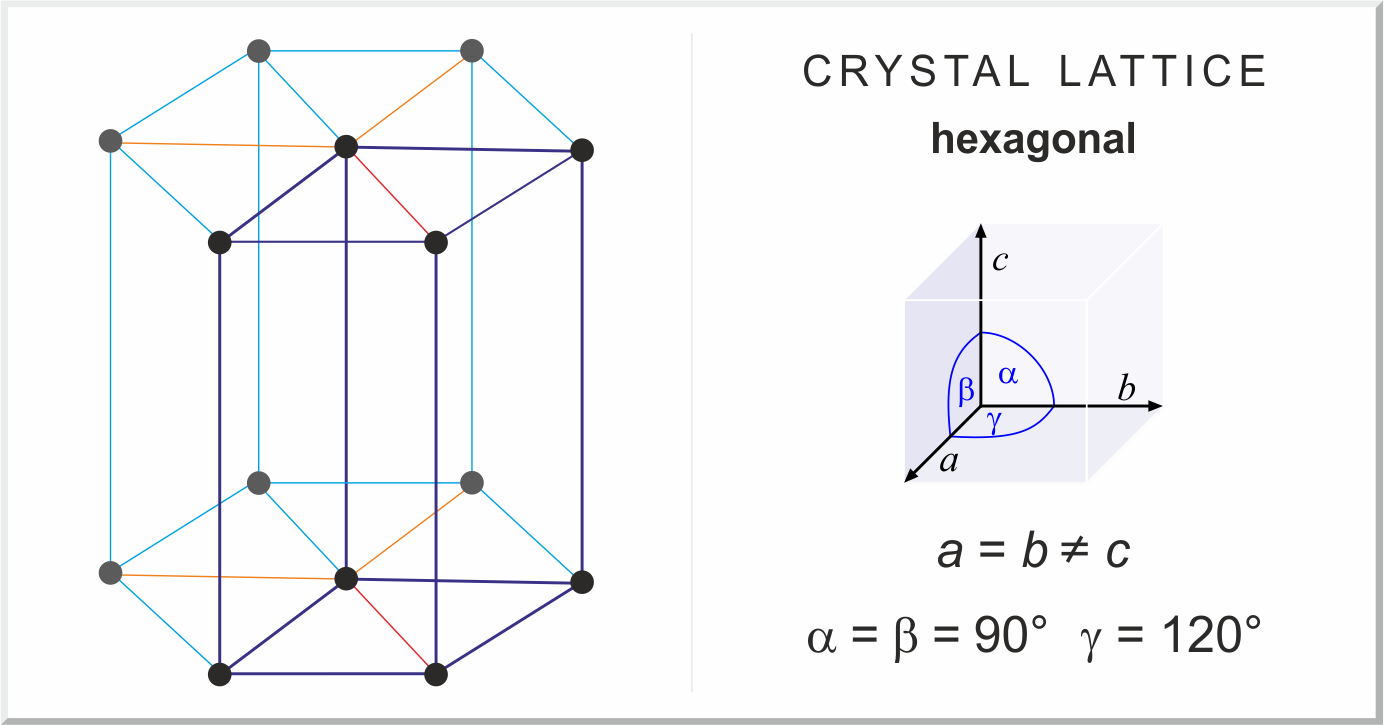

**first layer of the two outer layers**



In [31]:
# to find beads with 3 bonds( the first outer layer of beads) and change their atom type in atom list.

countType=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  #if count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7:
  if count_bonded_total[index] == 3 or count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7: #test 95 beads
    countType+=1
    #df.loc[index,"atomType"] = df.loc[index,"atomType"]+1
    df.loc[index,"atomType"] = '4'
    
#print (countType)
    #df.loc[df['atomID'] >atmCounter , 'atomID'] = df.loc[index,"atomID"]-atmCounter    #to modify the column of atomID after deleting the atoms of toluene in atom list. it is a if condition in python
print(df)

      atomID atomType                        x                        y  \
0          1        1   0.0000000000000000e+00   0.0000000000000000e+00   
1          2        4   2.6177096483897908e+00   6.4771515580875072e-01   
2          3        4   2.2437511271912491e+00   1.2954303116175017e+00   
3          4        4   1.8697926059927079e+00   1.9431454674262525e+00   
4          5        4   2.6177096483897908e+00  -6.4771515580875072e-01   
5          6        4   2.2437511271912491e+00   0.0000000000000000e+00   
6          7        4   1.8697926059927079e+00   6.4771515580875094e-01   
7          8        4   1.4958340847941662e+00   1.2954303116175019e+00   
8          9        4   1.1218755635956246e+00   1.9431454674262525e+00   
9         10        4   7.4791704239708312e-01   2.5908606232350033e+00   
10        11        4   2.2437511271912491e+00  -1.2954303116175017e+00   
11        12        4   1.8697926059927079e+00  -6.4771515580875094e-01   
12        13        4   1

In [32]:
for index in df.index:
  print(df.loc[index,"atomType"])

1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
4
4
4
4
4
1
1
1
1
1
1
4
4
4
4
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
4
4
4
4
1
1
1
1
1
1
4
4
4
4
4
1
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
4
4
4
4
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
4
4
4
4
1
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
1
1
1
4
4
4
1
1
1
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
1
4
4
4
4


In [33]:
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\firstOuterLayer.dat', 'w') as f: 
#with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/hexagonal_np/one_atom_type/simple_lattice_structure/very_simple_lattice/testbeads/95/2type3,4,5,6,7.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
#to write data frame with different atomType for first outer layer to a file
df.to_csv('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/hexagonal_np/one_atom_type/simple_lattice_structure/very_simple_lattice/5937beads/atomsBond4,5,6,7.dat', mode='w',  sep=" ", header=False)

Make Second layer

In [34]:
# we save the atomID of first layer beads and other beads in arrays 


other_atomNumber=atom_counter-countType

atomID_firstLayer_arr=np.zeros (countType)# df.shape[0] count number of rows in the data frame pandas
atomID_other_arr=np.zeros (other_atomNumber)# df.shape[0] count number of rows in the data frame pandas
count_firstLayer=0
count_other=0

for index in df.index:
  #if count_bonded[index] < 4:
   #if count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7:
   if count_bonded_total[index] == 3 or count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7: #test 95 beads  
     #atomID_firstLayer_arr[count_firstLayer]= df.loc[index,'atomID']
     atomID_firstLayer_arr[count_firstLayer]= index
     count_firstLayer+=1
   else:
     #atomID_other_arr[count_other]=df.loc[index,'atomID']  
     atomID_other_arr[count_other]=index 
     count_other+=1
    

print(atomID_firstLayer_arr.astype(int))
    

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   29
   30   31   32   33   34   35   36   37   38   39   40   41   42   43
   44   45   46   47   48   49   50   51   52   53   54   55   56   57
   58   59   60   61   62   63   64   65   66   67   71   72   73   74
   75   82   83   84   85   93   94   95  104  105  106  114  115  116
  125  126  127  135  136  137  138  145  146  147  148  149  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  174  175  176  177  184  185  186  196  197  208  209  221
  222  233  234  246  247  258  259  271  272  283  284  294  295  296
  303  304  305  306  310  311  312  313  314  315  316  317  318  319
  320  321  322  323  324  330  331  332  341  342  343  353  354  355
  366  367  379  380  393  394  406  407  420  421  433  434  445  446
  447  457  458  459  468  469  470  476  477  478  479  480  481  482
  483 

In [35]:
for i in range (0,other_atomNumber):
  print (i,'  ',atomID_other_arr[i].astype(int))

0    0
1    28
2    68
3    69
4    70
5    76
6    77
7    78
8    79
9    80
10    81
11    86
12    87
13    88
14    89
15    90
16    91
17    92
18    96
19    97
20    98
21    99
22    100
23    101
24    102
25    103
26    107
27    108
28    109
29    110
30    111
31    112
32    113
33    117
34    118
35    119
36    120
37    121
38    122
39    123
40    124
41    128
42    129
43    130
44    131
45    132
46    133
47    134
48    139
49    140
50    141
51    142
52    143
53    144
54    150
55    151
56    152
57    171
58    172
59    173
60    178
61    179
62    180
63    181
64    182
65    183
66    187
67    188
68    189
69    190
70    191
71    192
72    193
73    194
74    195
75    198
76    199
77    200
78    201
79    202
80    203
81    204
82    205
83    206
84    207
85    210
86    211
87    212
88    213
89    214
90    215
91    216
92    217
93    218
94    219
95    220
96    223
97    224
98    225
99    226
100    227
101    228
102    229


867    1240
868    1243
869    1244
870    1245
871    1246
872    1247
873    1248
874    1249
875    1250
876    1251
877    1252
878    1253
879    1254
880    1255
881    1256
882    1257
883    1260
884    1261
885    1262
886    1263
887    1264
888    1265
889    1266
890    1267
891    1268
892    1269
893    1270
894    1271
895    1272
896    1273
897    1276
898    1277
899    1278
900    1279
901    1280
902    1281
903    1282
904    1283
905    1284
906    1285
907    1286
908    1287
909    1288
910    1291
911    1292
912    1293
913    1294
914    1295
915    1296
916    1297
917    1298
918    1299
919    1300
920    1301
921    1302
922    1303
923    1304
924    1307
925    1308
926    1309
927    1310
928    1311
929    1312
930    1313
931    1314
932    1315
933    1316
934    1317
935    1318
936    1319
937    1322
938    1323
939    1324
940    1325
941    1326
942    1327
943    1328
944    1329
945    1330
946    1331
947    1332
948    1333
949    1337
950 

In [36]:
atomID_other_arr[:].shape

(1751,)

In [46]:
maximum_bond+1

5

**second layer of the two outer layers**

In [40]:
#find distance between the beads of other beads and beads of first outer layer
# if distance is equal to bond distance put the atom ID in an array
# convert 3D array to 1D

Xmsd=np.zeros ((atom_counter,atom_counter))# make 2D arrays
Ymsd=np.zeros ((atom_counter,atom_counter))
Zmsd=np.zeros ((atom_counter,atom_counter))
#Rmsd=np.zeros ((atom_counter,atom_counter))
Rmsd=np.zeros ((atom_counter+1,atom_counter+1)) # bc of last rmsd for second layer of outer layer
# #double array bc we want compare distances for each i and j  with each other

j=0
i=0
bonded_beads_Second_Outer=np.zeros(counter_bond)
counter2=0
counter_bond2=0 # to count total number of  bonds

bondedBeads_secondLayer=np.zeros((atom_counter+1,atom_counter+1,8+1)) # 8 is the highest number in max_bond[i] so here we have array with size of max number of bond a bead can have


df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)



for i in atomID_other_arr[:].astype(int):
  counter=0
  for j in atomID_firstLayer_arr[:].astype(int): #is the number itself in the array and not the index of the numbers in the array 
      
    dx=df.loc[j,'x']-df.loc[i,'x']
    dy=df.loc[j,'y']-df.loc[i,'y']
    dz=df.loc[j,'z']-df.loc[i,'z']

    Xmsd[i,j]+=np.power(dx,2)
    Ymsd[i,j]+=np.power(dy,2)
    Zmsd[i,j]+=np.power(dz,2)
        
    #distance of all beads from each other without repeating 2-1 after calc distance of 1-2. it is distance of 3 and 4 and is not distance 3 ordistance of 4. Rmsd[3,4] and not Rmsd[3] or Rmsd[4]
    Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);



    if round(Rmsd[i,j],4) == smallest_bead_distance:
       
       counter_bond2+=1
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array              
       bondedBeads_secondLayer[i][j][counter]= i  # here i and j are atomIDs in the arrays and not just index of array so we do not need to again find the atomID of this atomIDs



       if bondedBeads_secondLayer[i][j][counter] != 0:
      
         bonded_beads_Second_Outer[counter2] = bondedBeads_secondLayer[i][j][counter]  #convert 2D to 1D array Thank GOD!
         counter2+=1
      
print(counter_bond2,'   ',bonded_beads_Second_Outer) # for atomID= 4
       
       

1470     [28. 28. 28. ...  0.  0.  0.]


In [ ]:
#for i in atomID_other_arr[:].astype(int):
  #for j in atomID_firstLayer_arr[:].astype(int):
  
    #for k in range (1,maximum_bond+1):
      #if bondedBeads_secondLayer[i][j][k] != 0:
        #print(j,' ',bondedBeads_secondLayer[i][j][k])

In [41]:
bonded_beads_Second_Outer.shape

(9058,)

In [42]:
# to find beads other than first outer layer of beads  and change their atom type in atom list.

df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int
counter=0
 
for index in atomID_other_arr.astype(int): 
    counter+=1
    
    df.loc[index,"atomType"] = '3'
   
print(df)
print(counter)

      atomID atomType         x         y         z mx my mz
0          1        3  0.000000  0.000000  5.983336  0  0  0
1          2        4  2.617710  0.647715  5.235419  0  0  0
2          3        4  2.243751  1.295430  5.235419  0  0  0
3          4        4  1.869793  1.943145  5.235419  0  0  0
4          5        4  2.617710 -0.647715  5.235419  0  0  0
5          6        4  2.243751  0.000000  5.235419  0  0  0
6          7        4  1.869793  0.647715  5.235419  0  0  0
7          8        4  1.495834  1.295430  5.235419  0  0  0
8          9        4  1.121876  1.943145  5.235419  0  0  0
9         10        4  0.747917  2.590861  5.235419  0  0  0
10        11        4  2.243751 -1.295430  5.235419  0  0  0
11        12        4  1.869793 -0.647715  5.235419  0  0  0
12        13        4  1.495834  0.000000  5.235419  0  0  0
13        14        4  1.121876  0.647715  5.235419  0  0  0
14        15        4  0.747917  1.295430  5.235419  0  0  0
15        16        4  0

In [43]:
# to find beads that have bonds with the first outer layer of beads (find the second outer layer) and change their atom type in atom list.

df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int
counter=0

for index in bonded_beads_Second_Outer.astype(int):  
 if index != 0:
    counter+=1
    
    df.loc[index,"atomType"] = '2'
    
print(df)
print(counter)

      atomID atomType         x         y         z mx my mz
0          1        3  0.000000  0.000000  5.983336  0  0  0
1          2        4  2.617710  0.647715  5.235419  0  0  0
2          3        4  2.243751  1.295430  5.235419  0  0  0
3          4        4  1.869793  1.943145  5.235419  0  0  0
4          5        4  2.617710 -0.647715  5.235419  0  0  0
5          6        4  2.243751  0.000000  5.235419  0  0  0
6          7        4  1.869793  0.647715  5.235419  0  0  0
7          8        4  1.495834  1.295430  5.235419  0  0  0
8          9        4  1.121876  1.943145  5.235419  0  0  0
9         10        4  0.747917  2.590861  5.235419  0  0  0
10        11        4  2.243751 -1.295430  5.235419  0  0  0
11        12        4  1.869793 -0.647715  5.235419  0  0  0
12        13        4  1.495834  0.000000  5.235419  0  0  0
13        14        4  1.121876  0.647715  5.235419  0  0  0
14        15        4  0.747917  1.295430  5.235419  0  0  0
15        16        4  0

In [44]:
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\npSecondLayer2.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

In [38]:
#to write data frame to a file
df.to_csv(r'C:\bloodProject\NP\5937beads\npSecondLayer.dat', mode='w',  sep=" ", header=False)